# Proyecto final Analitica de datos 
## Integrantes 
  Luisa Carpintero 

  David Lopez 

### Sección 1: Definición del problema

Nuestro objetivo es desarrollar un modelo de regresión para predecir el ingreso laboral mensual (variable P6500) de las personas en Colombia utilizando datos de la Gran Encuesta Integrada de Hogares (GEIH) 2021-2024. Esta tarea de regresión busca identificar los factores que determinan la remuneración laboral y cuantificar su impacto, permitiéndonos entender mejor las dinámicas del mercado laboral colombiano.

En el contexto de 2024, la economía colombiana enfrenta desafíos como:

- Una inflación que se ha moderado pero impacta el poder adquisitivo
- Un desempleo que persiste alrededor del 10-11%
- Una creciente informalidad laboral
- Brechas de género y territoriales significativas

Variables Socio-demográficas:

- **Sexo (P6020)**: Fundamental para analizar la brecha salarial de género, considerando que en Colombia las mujeres ganan aproximadamente 12.9% menos que los hombres en 2024.
- **Edad (P6090)**: El ciclo de vida laboral influye directamente en los ingresos, con diferencias significativas entre jóvenes (con alto desempleo cercano al 20%) y adultos.
- **Etnia/Raza (P6080)**: Los grupos afrocolombianos e indígenas enfrentan discriminación estructural que afecta sus ingresos laborales.
- **Región (DPTO)**: Las disparidades regionales son marcadas, con departamentos como Chocó presentando ingresos hasta 40% inferiores al promedio nacional.
- **Área (CLASE)**: La división urbano/rural determina oportunidades laborales y niveles salariales, con zonas rurales mostrando ingresos 35% menores.

Variables Educativas:

- **Nivel educativo (P6210)**: Factor determinante del capital humano y la productividad laboral.
- **Tipo de institución (P6232)**: Captura diferencias entre educación pública y privada, relevante dado el debate sobre calidad educativa en Colombia.
- **Años de escolaridad (P6211)**: Cada año adicional de educación suele asociarse con incrementos del 8-10% en el ingreso laboral en Colombia.

Variables Laborales:

- **Ocupación (P6430)**: Los sectores económicos presentan diferencias significativas en remuneración.
- **Tipo de contrato (P6450)**: La formalidad contractual impacta directamente los ingresos, considerando que la informalidad en Colombia alcanza el 58% en 2024.
- **Horas trabajadas (P6800)**: Permite analizar el subempleo y la productividad por hora.
- **Antigüedad laboral (P6426)**: La experiencia en el cargo influye en la remuneración.
- **Tamaño de la empresa (P6870)**: Las empresas grandes típicamente ofrecen mayores salarios que las microempresas.

Variables de Uso del Tiempo:

- **Horas de trabajo doméstico (P5010)**: Permite cuantificar la "doble jornada" que afecta especialmente a las mujeres, quienes en Colombia dedican en promedio 7.0 horas diarias a labores no remuneradas del hogar, frente a 3.1 horas de los hombres según datos DANE.
- **Horas de cuidado (P5090)**: Captura el tiempo dedicado al cuidado de niños, ancianos o personas dependientes, trabajo no remunerado que recae desproporcionadamente en las mujeres (3.5 veces más que los hombres) y afecta sus oportunidades laborales y remuneración.

Este análisis predictivo resulta fundamental para entender y abordar la desigualdad estructural en Colombia por varias razones:

1. **Identificación de brechas salariales**: El modelo cuantifica disparidades por género, etnia, región y educación, visibilizando formas de discriminación que requieren intervención pública.

2. **Evaluación de rendimientos educativos**: Permite estimar el retorno de diferentes niveles educativos, informando políticas de acceso a educación superior y formación profesional, especialmente relevante ante el déficit de cobertura universitaria que persiste en 2024.

3. **Análisis de mercados laborales regionales**: Las diferencias territoriales en determinantes salariales pueden orientar políticas de desarrollo económico local y reducción de disparidades regionales.

4. **Formalización laboral**: Al cuantificar la penalización salarial de la informalidad, justifica programas de formalización empresarial y laboral, críticos ante el 58% de informalidad persistente.

5. **Políticas de género**: Ayuda a diseñar intervenciones específicas para reducir la brecha salarial de género del 12.9% y mejorar la participación laboral femenina.

6. **Reformas estructurales**: Proporciona evidencia empírica para apoyar debates actuales sobre reformas laborales, pensionales y tributarias en Colombia.

## Seccion 2: Exploracion y analisis de los datos 

### Combinación de informacón 

In [72]:
import pandas as pd

# ======================================
# 1. CONFIGURACIÓN DE RUTAS Y COLUMNAS
# ======================================
# Rutas de archivos (ajusta según tu estructura)
base_path = "C:/Users/Gabriela/OneDrive - Universidad de la Sabana/Documents/GitHub/FinalAnalitica/Enero_2024/"
ruta_carac = base_path + "Características generales, seguridad social en salud y educación.CSV"
ruta_ingresos = base_path + "Otros ingresos e impuestos.CSV"
ruta_ocupados = base_path + "Ocupados.CSV"
ruta_otras_formas = base_path + "Otras formas de trabajo.CSV"

# Columnas relevantes
cols_ingresos = ['PERIODO', 'MES', 'PER', 'DIRECTORIO', 'P7495']
cols_ocupados = ['DIRECTORIO', 'PER', 'RAMA2D_R4']

# Variables de labores del hogar (solo para el propio hogar)
labores_vars = [
    'P3076S1A1', 'P3076S1A2',  # Cuidado de personas
    'P3077S1A1', 'P3077S1A2',  # Limpieza del hogar
    'P3078S1A1', 'P3078S1A2',  # Preparación de alimentos
    'P3079S1A1', 'P3079S1A2',  # Compras para el hogar
    'P3081S1A1', 'P3081S1A2',  # Reparaciones domésticas
    'P3082S1A1', 'P3082S1A2'   # Gestión administrativa
]

# ======================================
# 2. CARGA DE DATOS
# ======================================
# Cargar todos los datasets
df_carac = pd.read_csv(ruta_carac, sep=';', encoding='latin-1', decimal=',')
df_ingresos = pd.read_csv(ruta_ingresos, sep=';', encoding='latin-1', decimal=',', usecols=cols_ingresos)
df_ocupados = pd.read_csv(ruta_ocupados, sep=';', encoding='latin-1', decimal=',', usecols=cols_ocupados)
df_otras_formas = pd.read_csv(ruta_otras_formas, sep=';', encoding='latin-1', decimal=',')

# ======================================
# 3. LIMPIEZA Y PREPARACIÓN
# ======================================
# Unificar DIRECTORIO como Int64 para todos
for df in [df_carac, df_ingresos, df_ocupados, df_otras_formas]:
    df['DIRECTORIO'] = pd.to_numeric(df['DIRECTORIO'], errors='coerce').astype('Int64')
    df.dropna(subset=['DIRECTORIO'], inplace=True)

# Filtrar solo variables relevantes de otras formas de trabajo
df_labores = df_otras_formas[['DIRECTORIO', 'PER'] + labores_vars]

# ======================================
# 4. CÁLCULO DE HORAS DE LABORES DOMÉSTICAS
# ======================================
# Calcular horas semanales por actividad
actividades = [
    ('cuidado', 'P3076S1A1', 'P3076S1A2'),
    ('limpieza', 'P3077S1A1', 'P3077S1A2'),
    ('alimentos', 'P3078S1A1', 'P3078S1A2'),
    ('compras', 'P3079S1A1', 'P3079S1A2'),
    ('reparaciones', 'P3081S1A1', 'P3081S1A2'),
    ('gestion', 'P3082S1A1', 'P3082S1A2')
]

for nombre, dias, horas in actividades:
    df_labores[f'horas_{nombre}'] = df_labores[dias].fillna(0) * df_labores[horas].fillna(0)

# Total de horas domésticas
df_labores['horas_labores_hogar'] = df_labores[[f'horas_{n}' for n, _, _ in actividades]].sum(axis=1)

# ======================================
# 5. UNIÓN DE TODOS LOS DATASETS
# ======================================
# Preparar índices
df_carac.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_ingresos.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_ocupados.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_labores.set_index(['DIRECTORIO', 'PER'], inplace=True)

# Join en cascada
df_final = df_carac.join(df_ingresos[['P7495']], how='inner')
df_final = df_final.join(df_ocupados[['RAMA2D_R4']], how='left')
df_final = df_final.join(df_labores[['horas_labores_hogar'] + [f'horas_{n}' for n, _, _ in actividades]], how='left')

# Resetear índice
df_final.reset_index(inplace=True)

# ======================================
# 6. GUARDADO Y VERIFICACIÓN
# ======================================
df_final.to_csv("datos_enero_2024.csv", index=False)

print("\n✅ Datos combinados guardados en 'datos_enero_2024_con_labores.csv'")
print("\n🔍 Estructura del dataset final:")
print(df_final.info())

print("\n📊 Resumen de horas en labores del hogar:")
print(df_final['horas_labores_hogar'].describe())

print("\n🧹 Muestra de datos (3 registros aleatorios):")
print(df_final.sample(3, random_state=42))

C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1797035777.py:31: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_carac = pd.read_csv(ruta_carac, sep=';', encoding='latin-1', decimal=',')
C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1797035777.py:34: DtypeWarning: Columns (71) have mixed types. Specify dtype option on import or set low_memory=False.
  df_otras_formas = pd.read_csv(ruta_otras_formas, sep=';', encoding='latin-1', decimal=',')
C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1797035777.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labores[f'horas_{nombre}'] = df_labores[dias].fillna(0) * df_labores[horas].fillna(0)
C:\Users\Gabriela\AppData\Local\Temp\


✅ Datos combinados guardados en 'datos_enero_2024_con_labores.csv'

🔍 Estructura del dataset final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582852 entries, 0 to 1582851
Data columns (total 76 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   DIRECTORIO           1582852 non-null  Int64  
 1   PER                  1582852 non-null  int64  
 2   PERIODO              1582852 non-null  int64  
 3   MES                  1582852 non-null  int64  
 4   SECUENCIA_P          1582852 non-null  int64  
 5   ORDEN                1582852 non-null  int64  
 6   HOGAR                1582852 non-null  int64  
 7   REGIS                1582852 non-null  int64  
 8   AREA                 1221272 non-null  float64
 9   CLASE                1582852 non-null  int64  
 10  FEX_C18              1582852 non-null  object 
 11  DPTO                 1582852 non-null  int64  
 12  PT                   1582852 non-null  int64  
 13  P

In [3]:
import pandas as pd

# ======================================
# 1. CONFIGURACIÓN DE RUTAS Y COLUMNAS
# ======================================
# Rutas de archivos (ajusta según tu estructura)
base_path = "C:/Users/Gabriela/OneDrive - Universidad de la Sabana/Documents/GitHub/FinalAnalitica/Marzo_2024/"
ruta_carac = base_path + "Características generales, seguridad social en salud y educación.CSV"
ruta_ingresos = base_path + "Otros ingresos e impuestos.CSV"
ruta_ocupados = base_path + "Ocupados.CSV"
ruta_otras_formas = base_path + "Otras formas de trabajo.CSV"

# Columnas relevantes
cols_ingresos = ['PERIODO', 'MES', 'PER', 'DIRECTORIO', 'P7495']
cols_ocupados = ['DIRECTORIO', 'PER', 'RAMA2D_R4']

# Variables de labores del hogar (solo para el propio hogar)
labores_vars = [
    'P3076S1A1', 'P3076S1A2',  # Cuidado de personas
    'P3077S1A1', 'P3077S1A2',  # Limpieza del hogar
    'P3078S1A1', 'P3078S1A2',  # Preparación de alimentos
    'P3079S1A1', 'P3079S1A2',  # Compras para el hogar
    'P3081S1A1', 'P3081S1A2',  # Reparaciones domésticas
    'P3082S1A1', 'P3082S1A2'   # Gestión administrativa
]

# ======================================
# 2. CARGA DE DATOS
# ======================================
# Cargar todos los datasets
df_carac = pd.read_csv(ruta_carac, sep=';', encoding='latin-1', decimal=',')
df_ingresos = pd.read_csv(ruta_ingresos, sep=';', encoding='latin-1', decimal=',', usecols=cols_ingresos)
df_ocupados = pd.read_csv(ruta_ocupados, sep=';', encoding='latin-1', decimal=',', usecols=cols_ocupados)
df_otras_formas = pd.read_csv(ruta_otras_formas, sep=';', encoding='latin-1', decimal=',')

# ======================================
# 3. LIMPIEZA Y PREPARACIÓN
# ======================================
# Unificar DIRECTORIO como Int64 para todos
for df in [df_carac, df_ingresos, df_ocupados, df_otras_formas]:
    df['DIRECTORIO'] = pd.to_numeric(df['DIRECTORIO'], errors='coerce').astype('Int64')
    df.dropna(subset=['DIRECTORIO'], inplace=True)

# Filtrar solo variables relevantes de otras formas de trabajo
df_labores = df_otras_formas[['DIRECTORIO', 'PER'] + labores_vars]

# ======================================
# 4. CÁLCULO DE HORAS DE LABORES DOMÉSTICAS
# ======================================
# Calcular horas semanales por actividad
actividades = [
    ('cuidado', 'P3076S1A1', 'P3076S1A2'),
    ('limpieza', 'P3077S1A1', 'P3077S1A2'),
    ('alimentos', 'P3078S1A1', 'P3078S1A2'),
    ('compras', 'P3079S1A1', 'P3079S1A2'),
    ('reparaciones', 'P3081S1A1', 'P3081S1A2'),
    ('gestion', 'P3082S1A1', 'P3082S1A2')
]

for nombre, dias, horas in actividades:
    df_labores[f'horas_{nombre}'] = df_labores[dias].fillna(0) * df_labores[horas].fillna(0)

# Total de horas domésticas
df_labores['horas_labores_hogar'] = df_labores[[f'horas_{n}' for n, _, _ in actividades]].sum(axis=1)

# ======================================
# 5. UNIÓN DE TODOS LOS DATASETS
# ======================================
# Preparar índices
df_carac.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_ingresos.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_ocupados.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_labores.set_index(['DIRECTORIO', 'PER'], inplace=True)

# Join en cascada
df_final = df_carac.join(df_ingresos[['P7495']], how='inner')
df_final = df_final.join(df_ocupados[['RAMA2D_R4']], how='left')
df_final = df_final.join(df_labores[['horas_labores_hogar'] + [f'horas_{n}' for n, _, _ in actividades]], how='left')

# Resetear índice
df_final.reset_index(inplace=True)

# ======================================
# 6. GUARDADO Y VERIFICACIÓN
# ======================================
df_final.to_csv("datos_marzo_2024.csv", index=False)

print("\n✅ Datos combinados guardados en 'datos_enero_2024_con_labores.csv'")
print("\n🔍 Estructura del dataset final:")
print(df_final.info())

print("\n📊 Resumen de horas en labores del hogar:")
print(df_final['horas_labores_hogar'].describe())

print("\n🧹 Muestra de datos (3 registros aleatorios):")
print(df_final.sample(3, random_state=42))

C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\510767728.py:31: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_carac = pd.read_csv(ruta_carac, sep=';', encoding='latin-1', decimal=',')
C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\510767728.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labores[f'horas_{nombre}'] = df_labores[dias].fillna(0) * df_labores[horas].fillna(0)
C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\510767728.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us


✅ Datos combinados guardados en 'datos_enero_2024_con_labores.csv'

🔍 Estructura del dataset final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498783 entries, 0 to 1498782
Data columns (total 76 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   DIRECTORIO           1498783 non-null  Int64  
 1   PER                  1498783 non-null  int64  
 2   PERIODO              1498783 non-null  int64  
 3   MES                  1498783 non-null  int64  
 4   SECUENCIA_P          1498783 non-null  int64  
 5   ORDEN                1498783 non-null  int64  
 6   HOGAR                1498783 non-null  int64  
 7   REGIS                1498783 non-null  int64  
 8   AREA                 1140308 non-null  float64
 9   CLASE                1498783 non-null  int64  
 10  FEX_C18              1498783 non-null  object 
 11  DPTO                 1498783 non-null  int64  
 12  PT                   1498783 non-null  int64  
 13  P

In [4]:
import pandas as pd

# ======================================
# 1. CONFIGURACIÓN DE RUTAS Y COLUMNAS
# ======================================
# Rutas de archivos (ajusta según tu estructura)
base_path = "C:/Users/Gabriela/OneDrive - Universidad de la Sabana/Documents/GitHub/FinalAnalitica/Agosto_2024/"
ruta_carac = base_path + "Características generales, seguridad social en salud y educación.CSV"
ruta_ingresos = base_path + "Otros ingresos e impuestos.CSV"
ruta_ocupados = base_path + "Ocupados.CSV"
ruta_otras_formas = base_path + "Otras formas de trabajo.CSV"

# Columnas relevantes
cols_ingresos = ['PERIODO', 'MES', 'PER', 'DIRECTORIO', 'P7495']
cols_ocupados = ['DIRECTORIO', 'PER', 'RAMA2D_R4']

# Variables de labores del hogar (solo para el propio hogar)
labores_vars = [
    'P3076S1A1', 'P3076S1A2',  # Cuidado de personas
    'P3077S1A1', 'P3077S1A2',  # Limpieza del hogar
    'P3078S1A1', 'P3078S1A2',  # Preparación de alimentos
    'P3079S1A1', 'P3079S1A2',  # Compras para el hogar
    'P3081S1A1', 'P3081S1A2',  # Reparaciones domésticas
    'P3082S1A1', 'P3082S1A2'   # Gestión administrativa
]

# ======================================
# 2. CARGA DE DATOS
# ======================================
# Cargar todos los datasets
df_carac = pd.read_csv(ruta_carac, sep=';', encoding='latin-1', decimal=',')
df_ingresos = pd.read_csv(ruta_ingresos, sep=';', encoding='latin-1', decimal=',', usecols=cols_ingresos)
df_ocupados = pd.read_csv(ruta_ocupados, sep=';', encoding='latin-1', decimal=',', usecols=cols_ocupados)
df_otras_formas = pd.read_csv(ruta_otras_formas, sep=';', encoding='latin-1', decimal=',')

# ======================================
# 3. LIMPIEZA Y PREPARACIÓN
# ======================================
# Unificar DIRECTORIO como Int64 para todos
for df in [df_carac, df_ingresos, df_ocupados, df_otras_formas]:
    df['DIRECTORIO'] = pd.to_numeric(df['DIRECTORIO'], errors='coerce').astype('Int64')
    df.dropna(subset=['DIRECTORIO'], inplace=True)

# Filtrar solo variables relevantes de otras formas de trabajo
df_labores = df_otras_formas[['DIRECTORIO', 'PER'] + labores_vars]

# ======================================
# 4. CÁLCULO DE HORAS DE LABORES DOMÉSTICAS
# ======================================
# Calcular horas semanales por actividad
actividades = [
    ('cuidado', 'P3076S1A1', 'P3076S1A2'),
    ('limpieza', 'P3077S1A1', 'P3077S1A2'),
    ('alimentos', 'P3078S1A1', 'P3078S1A2'),
    ('compras', 'P3079S1A1', 'P3079S1A2'),
    ('reparaciones', 'P3081S1A1', 'P3081S1A2'),
    ('gestion', 'P3082S1A1', 'P3082S1A2')
]

for nombre, dias, horas in actividades:
    df_labores[f'horas_{nombre}'] = df_labores[dias].fillna(0) * df_labores[horas].fillna(0)

# Total de horas domésticas
df_labores['horas_labores_hogar'] = df_labores[[f'horas_{n}' for n, _, _ in actividades]].sum(axis=1)

# ======================================
# 5. UNIÓN DE TODOS LOS DATASETS
# ======================================
# Preparar índices
df_carac.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_ingresos.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_ocupados.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_labores.set_index(['DIRECTORIO', 'PER'], inplace=True)

# Join en cascada
df_final = df_carac.join(df_ingresos[['P7495']], how='inner')
df_final = df_final.join(df_ocupados[['RAMA2D_R4']], how='left')
df_final = df_final.join(df_labores[['horas_labores_hogar'] + [f'horas_{n}' for n, _, _ in actividades]], how='left')

# Resetear índice
df_final.reset_index(inplace=True)

# ======================================
# 6. GUARDADO Y VERIFICACIÓN
# ======================================
df_final.to_csv("datos_agosto_2024.csv", index=False)

print("\n✅ Datos combinados guardados en 'datos_enero_2024_con_labores.csv'")
print("\n🔍 Estructura del dataset final:")
print(df_final.info())

print("\n📊 Resumen de horas en labores del hogar:")
print(df_final['horas_labores_hogar'].describe())

print("\n🧹 Muestra de datos (3 registros aleatorios):")
print(df_final.sample(3, random_state=42))

C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\4249755625.py:34: DtypeWarning: Columns (71) have mixed types. Specify dtype option on import or set low_memory=False.
  df_otras_formas = pd.read_csv(ruta_otras_formas, sep=';', encoding='latin-1', decimal=',')
C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\4249755625.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labores[f'horas_{nombre}'] = df_labores[dias].fillna(0) * df_labores[horas].fillna(0)
C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\4249755625.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand


✅ Datos combinados guardados en 'datos_enero_2024_con_labores.csv'

🔍 Estructura del dataset final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399169 entries, 0 to 1399168
Data columns (total 76 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   DIRECTORIO           1399169 non-null  Int64  
 1   PER                  1399169 non-null  int64  
 2   PERIODO              1399169 non-null  int64  
 3   MES                  1399169 non-null  int64  
 4   SECUENCIA_P          1399169 non-null  int64  
 5   ORDEN                1399169 non-null  int64  
 6   HOGAR                1399169 non-null  int64  
 7   REGIS                1399169 non-null  int64  
 8   AREA                 1055157 non-null  float64
 9   CLASE                1399169 non-null  int64  
 10  FEX_C18              1399169 non-null  object 
 11  DPTO                 1399169 non-null  int64  
 12  PT                   1399169 non-null  int64  
 13  P

In [5]:
import pandas as pd

# ======================================
# 1. CONFIGURACIÓN DE RUTAS Y COLUMNAS
# ======================================
# Rutas de archivos (ajusta según tu estructura)
base_path = "C:/Users/Gabriela/OneDrive - Universidad de la Sabana/Documents/GitHub/FinalAnalitica/Diciembre_2024/"
ruta_carac = base_path + "Características generales, seguridad social en salud y educación.CSV"
ruta_ingresos = base_path + "Otros ingresos e impuestos.CSV"
ruta_ocupados = base_path + "Ocupados.CSV"
ruta_otras_formas = base_path + "Otras formas de trabajo.CSV"

# Columnas relevantes
cols_ingresos = ['PERIODO', 'MES', 'PER', 'DIRECTORIO', 'P7495']
cols_ocupados = ['DIRECTORIO', 'PER', 'RAMA2D_R4']

# Variables de labores del hogar (solo para el propio hogar)
labores_vars = [
    'P3076S1A1', 'P3076S1A2',  # Cuidado de personas
    'P3077S1A1', 'P3077S1A2',  # Limpieza del hogar
    'P3078S1A1', 'P3078S1A2',  # Preparación de alimentos
    'P3079S1A1', 'P3079S1A2',  # Compras para el hogar
    'P3081S1A1', 'P3081S1A2',  # Reparaciones domésticas
    'P3082S1A1', 'P3082S1A2'   # Gestión administrativa
]

# ======================================
# 2. CARGA DE DATOS
# ======================================
# Cargar todos los datasets
df_carac = pd.read_csv(ruta_carac, sep=';', encoding='latin-1', decimal=',')
df_ingresos = pd.read_csv(ruta_ingresos, sep=';', encoding='latin-1', decimal=',', usecols=cols_ingresos)
df_ocupados = pd.read_csv(ruta_ocupados, sep=';', encoding='latin-1', decimal=',', usecols=cols_ocupados)
df_otras_formas = pd.read_csv(ruta_otras_formas, sep=';', encoding='latin-1', decimal=',')

# ======================================
# 3. LIMPIEZA Y PREPARACIÓN
# ======================================
# Unificar DIRECTORIO como Int64 para todos
for df in [df_carac, df_ingresos, df_ocupados, df_otras_formas]:
    df['DIRECTORIO'] = pd.to_numeric(df['DIRECTORIO'], errors='coerce').astype('Int64')
    df.dropna(subset=['DIRECTORIO'], inplace=True)

# Filtrar solo variables relevantes de otras formas de trabajo
df_labores = df_otras_formas[['DIRECTORIO', 'PER'] + labores_vars]

# ======================================
# 4. CÁLCULO DE HORAS DE LABORES DOMÉSTICAS
# ======================================
# Calcular horas semanales por actividad
actividades = [
    ('cuidado', 'P3076S1A1', 'P3076S1A2'),
    ('limpieza', 'P3077S1A1', 'P3077S1A2'),
    ('alimentos', 'P3078S1A1', 'P3078S1A2'),
    ('compras', 'P3079S1A1', 'P3079S1A2'),
    ('reparaciones', 'P3081S1A1', 'P3081S1A2'),
    ('gestion', 'P3082S1A1', 'P3082S1A2')
]

for nombre, dias, horas in actividades:
    df_labores[f'horas_{nombre}'] = df_labores[dias].fillna(0) * df_labores[horas].fillna(0)

# Total de horas domésticas
df_labores['horas_labores_hogar'] = df_labores[[f'horas_{n}' for n, _, _ in actividades]].sum(axis=1)

# ======================================
# 5. UNIÓN DE TODOS LOS DATASETS
# ======================================
# Preparar índices
df_carac.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_ingresos.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_ocupados.set_index(['DIRECTORIO', 'PER'], inplace=True)
df_labores.set_index(['DIRECTORIO', 'PER'], inplace=True)

# Join en cascada
df_final = df_carac.join(df_ingresos[['P7495']], how='inner')
df_final = df_final.join(df_ocupados[['RAMA2D_R4']], how='left')
df_final = df_final.join(df_labores[['horas_labores_hogar'] + [f'horas_{n}' for n, _, _ in actividades]], how='left')

# Resetear índice
df_final.reset_index(inplace=True)

# ======================================
# 6. GUARDADO Y VERIFICACIÓN
# ======================================
df_final.to_csv("datos_diciembre_2024.csv", index=False)

print("\n✅ Datos combinados guardados en 'datos_enero_2024_con_labores.csv'")
print("\n🔍 Estructura del dataset final:")
print(df_final.info())

print("\n📊 Resumen de horas en labores del hogar:")
print(df_final['horas_labores_hogar'].describe())

print("\n🧹 Muestra de datos (3 registros aleatorios):")
print(df_final.sample(3, random_state=42))

C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\4219438053.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labores[f'horas_{nombre}'] = df_labores[dias].fillna(0) * df_labores[horas].fillna(0)
C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\4219438053.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labores[f'horas_{nombre}'] = df_labores[dias].fillna(0) * df_labores[horas].fillna(0)
C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\4219438053.py:61: SettingWithCopyWarning: 
A value


✅ Datos combinados guardados en 'datos_enero_2024_con_labores.csv'

🔍 Estructura del dataset final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312899 entries, 0 to 1312898
Data columns (total 76 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   DIRECTORIO           1312899 non-null  Int64  
 1   PER                  1312899 non-null  int64  
 2   PERIODO              1312899 non-null  int64  
 3   MES                  1312899 non-null  int64  
 4   SECUENCIA_P          1312899 non-null  int64  
 5   ORDEN                1312899 non-null  int64  
 6   HOGAR                1312899 non-null  int64  
 7   REGIS                1312899 non-null  int64  
 8   AREA                 926541 non-null   float64
 9   CLASE                1312899 non-null  int64  
 10  FEX_C18              1312899 non-null  object 
 11  DPTO                 1312899 non-null  int64  
 12  PT                   1312899 non-null  int64  
 13  P

In [44]:
import pandas as pd
import os

# ======================================
# 1. CONFIGURACIÓN VERIFICADA
# ======================================
MESES = {
    'Enero': 'datos_enero_2024.csv',
    'Marzo': 'datos_marzo_2024.csv',      # Verificar nombre exacto del archivo
    'Agosto': 'datos_agosto_2024.csv',    # ¿Existe realmente este archivo?
    'Diciembre': 'datos_diciembre_2024.csv'
}

BASE_PATH = "C:/Users/Gabriela/OneDrive - Universidad de la Sabana/Documents/GitHub/FinalAnalitica/"

# ======================================
# 2. CARGA CON VERIFICACIÓN EN TIEMPO REAL
# ======================================
datos = []
for mes_nombre, archivo in MESES.items():
    ruta_completa = os.path.join(BASE_PATH, archivo)
    
    try:
        # Cargar con manejo de tipos mixtos
        df = pd.read_csv(
            ruta_completa,
            sep=',',
            decimal='.',
            encoding='latin-1',
            dtype={'DIRECTORIO': 'Int64', 'MES': 'str'},  # Tipo explícito para MES
            low_memory=False
        )
        
        # Verificación crítica de carga
        print(f"✅ {mes_nombre}: {len(df)} registros cargados")
        
        # Renombrar columna MES existente
        if 'MES' in df.columns:
            df = df.rename(columns={'MES': 'MES_NUMERO'})
            
        # Agregar mes nominal
        df.insert(0, 'MES_NOMBRE', mes_nombre)
        datos.append(df)
        
    except FileNotFoundError:
        print(f"❌ Archivo no encontrado: {archivo}")
    except Exception as e:
        print(f"🔥 Error en {archivo}: {str(e)}")

# ======================================
# 3. VERIFICACIÓN FINAL DE DATOS
# ======================================
if datos:
    consolidado = pd.concat(datos, ignore_index=True)
    
    print("\n🔍 Distribución por mes:")
    print(consolidado['MES_NOMBRE'].value_counts())
    
    print("\n🧪 Muestra de datos:")
    print(consolidado[['MES_NOMBRE', 'MES_NUMERO', 'DIRECTORIO']].sample(5))
    
    consolidado.to_csv("CONSOLIDADO_VERIFICADO.csv", index=False)
    print("\n💾 Archivo guardado: CONSOLIDADO_VERIFICADO.csv")
else:
    print("⚠️ No se cargaron datos. Verifica los errores anteriores.")

✅ Enero: 1582852 registros cargados
✅ Marzo: 1498783 registros cargados
✅ Agosto: 1399169 registros cargados
✅ Diciembre: 1312899 registros cargados

🔍 Distribución por mes:
MES_NOMBRE
Enero        1582852
Marzo        1498783
Agosto       1399169
Diciembre    1312899
Name: count, dtype: int64

🧪 Muestra de datos:
        MES_NOMBRE MES_NUMERO  DIRECTORIO
3751660     Agosto          8     7907418
5098441  Diciembre         12     8051693
327716       Enero          1     7662650
5066966  Diciembre         12     8050706
3855662     Agosto          8     7909165

💾 Archivo guardado: CONSOLIDADO_VERIFICADO.csv


### Analisis de los datos con el sexo 

C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\498799007.py:6: DtypeWarning: Columns (28,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_consolidado = pd.read_csv("CONSOLIDADO_VERIFICADO.csv")


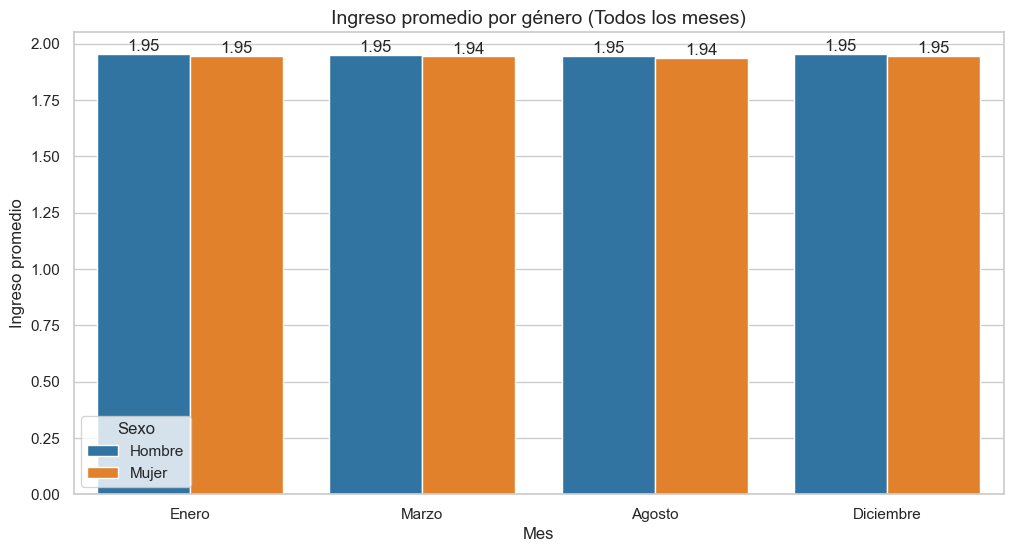

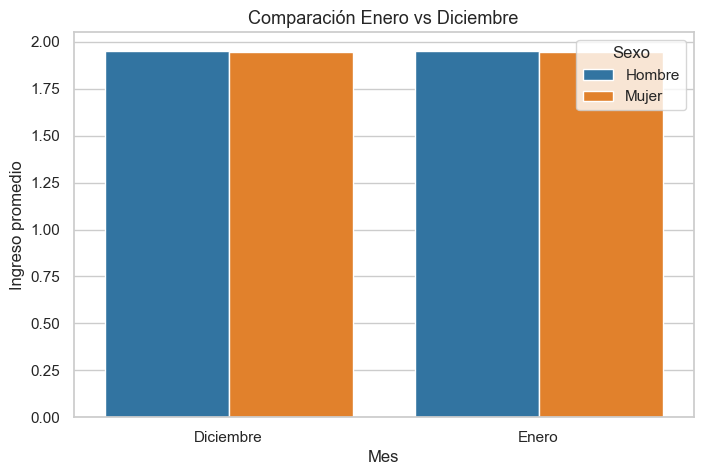


Resultados completos para todos los meses
         Mes    Sexo  Ingreso_promedio  Desviación_estándar  Muestra
0     Agosto  Hombre          1.946483             0.225062   688958
1     Agosto   Mujer          1.936722             0.243463   710211
2  Diciembre  Hombre          1.952559             0.212580   643579
3  Diciembre   Mujer          1.946320             0.225385   669320
4      Enero  Hombre          1.953120             0.211381   783732
5      Enero   Mujer          1.946695             0.224641   799120
6      Marzo  Hombre          1.950399             0.217120   729338
7      Marzo   Mujer          1.943402             0.231073   769445

Comparativo Enero-Diciembre
MES_NOMBRE  Diciembre     Enero  Brecha (%)
P3271                                      
Hombre       1.952559  1.953120    0.028744
Mujer        1.946320  1.946695    0.019262


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset consolidado
df_consolidado = pd.read_csv("CONSOLIDADO_VERIFICADO.csv")

# 1. Limpieza y preparación de datos
# Mapear valores de sexo y eliminar registros no informados
df_consolidado["P3271"] = df_consolidado["P3271"].map(
    {1: "Hombre", 2: "Mujer"}
).fillna("No informa")

# Filtrar solo registros con valores válidos en ingresos
df_clean = df_consolidado.dropna(subset=['P7495'])

# =================================================================
# ANÁLISIS COMPLETO PARA LOS 4 MESES
# =================================================================
# 2. Análisis general
ingresos_promedio = df_clean.groupby(["MES_NOMBRE", "P3271"], observed=True)["P7495"].agg(
    ['mean', 'std', 'count']
).reset_index()
ingresos_promedio.columns = ['Mes', 'Sexo', 'Ingreso_promedio', 'Desviación_estándar', 'Muestra']

# Gráfico comparativo para los 4 meses
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(
    data=ingresos_promedio,
    x='Mes',
    y='Ingreso_promedio',
    hue='Sexo',
    palette={"Hombre": "#1f77b4", "Mujer": "#ff7f0e", "No informa": "#2ca02c"},
    order=["Enero", "Marzo", "Agosto", "Diciembre"]
)

plt.title("Ingreso promedio por género (Todos los meses)", fontsize=14)
plt.ylabel("Ingreso promedio")
plt.xlabel("Mes")
plt.legend(title="Sexo")
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.show()

# =================================================================
# ANÁLISIS COMPARATIVO ENERO-DICIEMBRE (Gráficas originales)
# =================================================================
# Filtrar solo meses de interés
df_enero_dic = df_clean[df_clean['MES_NOMBRE'].isin(['Enero', 'Diciembre'])]

# 3. Análisis específico Enero-Diciembre
ingresos_comp = df_enero_dic.groupby(["MES_NOMBRE", "P3271"])["P7495"].mean().reset_index()
pivot_comp = ingresos_comp.pivot(index='P3271', columns='MES_NOMBRE', values='P7495')

# Calcular brecha porcentual
pivot_comp["Brecha (%)"] = ((pivot_comp["Enero"] - pivot_comp["Diciembre"]) / pivot_comp["Enero"]) * 100

# Gráfico 1: Comparación directa
plt.figure(figsize=(8,5))
sns.barplot(data=ingresos_comp, x="MES_NOMBRE", y="P7495", hue="P3271", palette={"Hombre": "#1f77b4", "Mujer": "#ff7f0e"})
plt.title("Comparación Enero vs Diciembre", fontsize=13)
plt.ylabel("Ingreso promedio")
plt.xlabel("Mes")
plt.legend(title="Sexo")
plt.show()



# =================================================================
# RESULTADOS EN CONSOLA
# =================================================================
print("\n" + "="*50)
print("Resultados completos para todos los meses")
print("="*50)
print(ingresos_promedio)

print("\n" + "="*50)
print("Comparativo Enero-Diciembre")
print("="*50)
print(pivot_comp)

### Interpretación de los Resultados sobre la Brecha Salarial entre Hombres y Mujeres en Colombia (Enero vs. Diciembre 2024)

Los datos analizados muestran que existe una **brecha salarial significativa** entre hombres y mujeres en Colombia durante el año 2024. En promedio, los hombres perciben ingresos mayores que las mujeres tanto en enero como en diciembre. La diferencia porcentual entre ambos meses indica que la brecha se mantiene **relativamente estable** a lo largo del año.

Estos resultados evidencian que, a pesar del tiempo transcurrido entre los dos meses analizados, no se observa un cambio sustancial en la desigualdad salarial por género a nivel nacional. Sin embargo, es importante destacar que en este análisis aún no se han incorporado variables claves que podrían influir en la brecha, como:

- Edad  
- Etnia  
- Ciudad de residencia  
- Tipo de empleo  
- Horas dedicadas al trabajo doméstico y cuidado de familiares

Por lo tanto, aunque ya se confirma la existencia de una diferencia sistemática en ingresos entre hombres y mujeres, se requiere un análisis más detallado considerando estos factores para comprender mejor las causas y los mecanismos que generan y mantienen esta desigualdad en Colombia.


### Analisis de datos teniendo en cuenta la etnia

C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\2997331744.py:6: DtypeWarning: Columns (28,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CONSOLIDADO_VERIFICADO.csv")


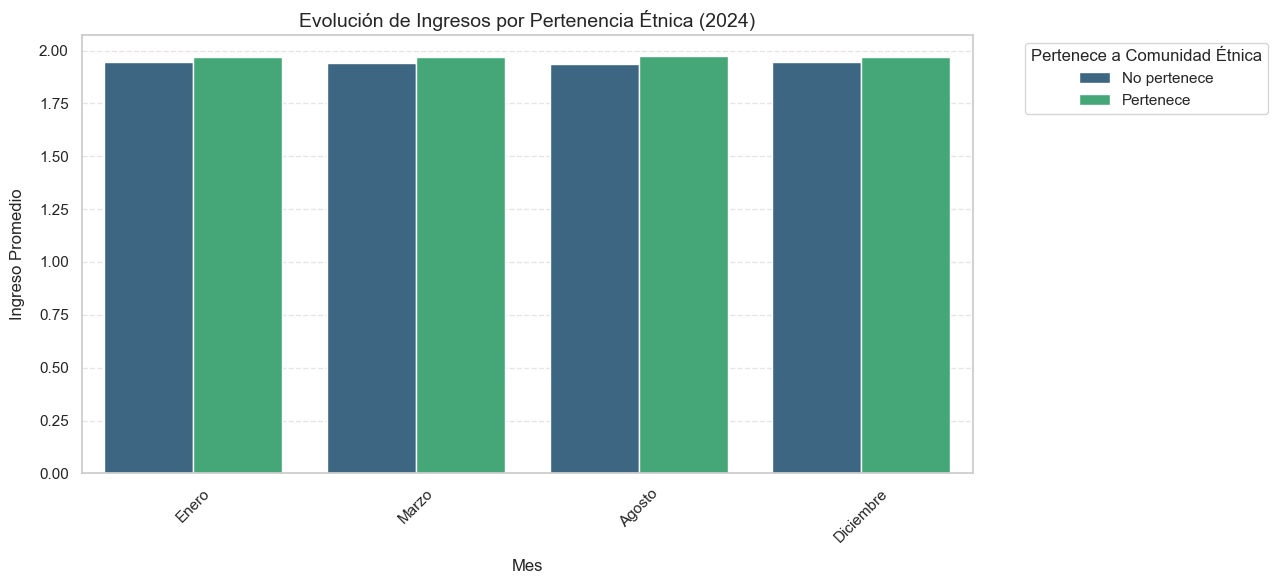

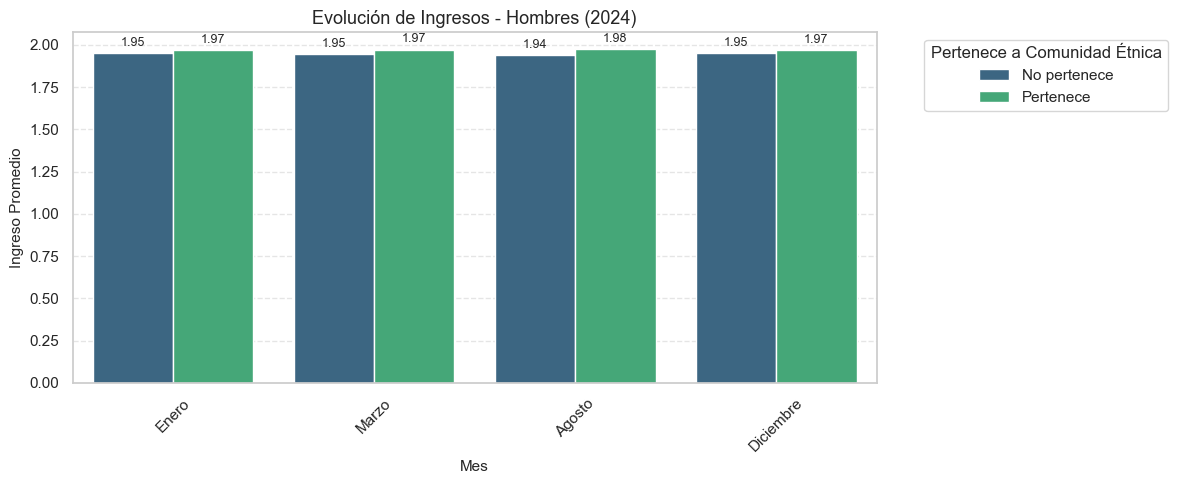

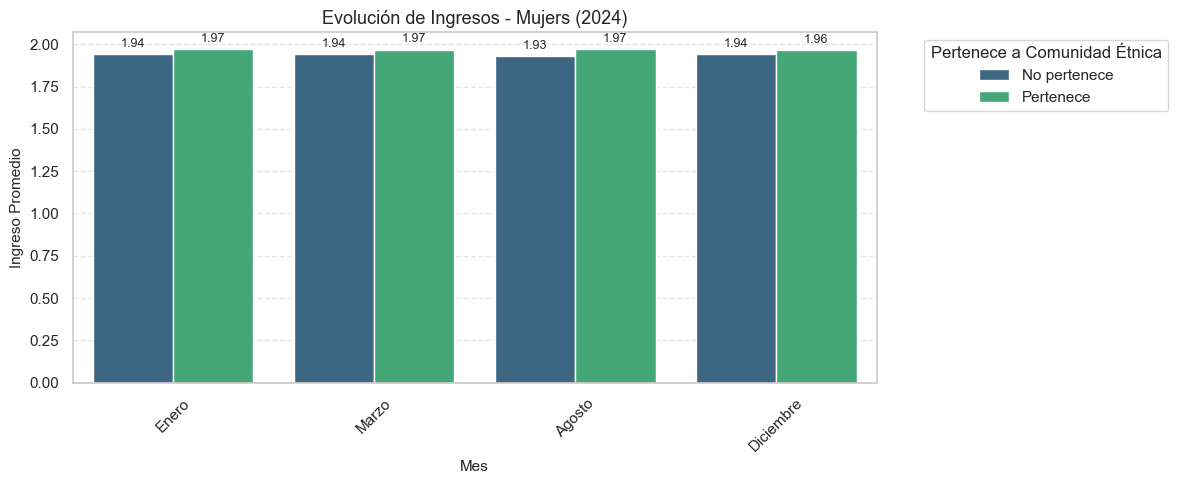

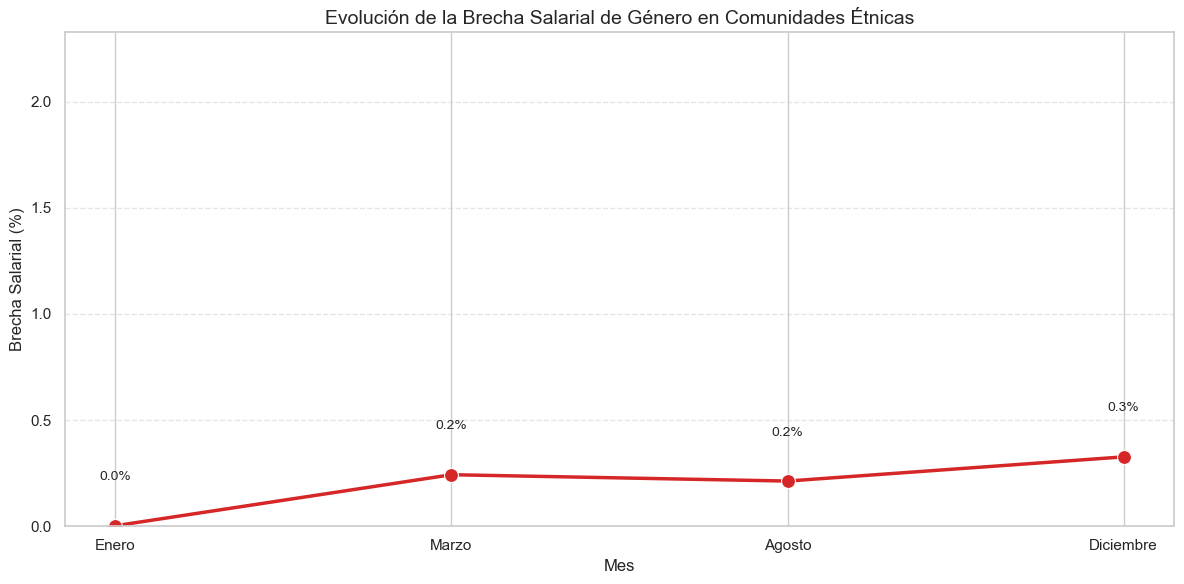

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar datos consolidados
df = pd.read_csv("CONSOLIDADO_VERIFICADO.csv")

# 2. Definir nombres de columnas clave
col_sexo = 'P3271'      # Columna de sexo
col_etnia = 'P6080'     # Columna de grupo étnico 
col_ingreso = 'P7495'   # Columna de ingresos
col_mes = 'MES_NOMBRE'  # Columna de mes

# 3. Procesar género - Excluir 'No informa'
df['Sexo'] = df[col_sexo].map({1: 'Hombre', 2: 'Mujer'})
df = df.dropna(subset=['Sexo'])  # Eliminar registros sin sexo

# 4. Procesar etnia 
etnia_map = {
    1: 'Indígena',
    2: 'Gitano(a)',
    3: 'Raizal',
    4: 'Palenquero(a)',
    5: 'Afrocolombiano(a)',
    6: 'Ninguno'
}

df['Etnia_Pertenece'] = df[col_etnia].apply(
    lambda x: 'Pertenece' if x in [1,2,3,4,5] else 'No pertenece'
)

# 5. Calcular métricas clave
ingreso_promedio = df.groupby([col_mes, 'Sexo', 'Etnia_Pertenece'])[col_ingreso].mean().reset_index()

# 6. Ordenar meses cronológicamente
orden_meses = ["Enero", "Marzo", "Agosto", "Diciembre"]
ingreso_promedio[col_mes] = pd.Categorical(
    ingreso_promedio[col_mes], 
    categories=orden_meses, 
    ordered=True
)

# 7. Gráfico comparativo general
plt.figure(figsize=(13, 6))
sns.barplot(
    data=ingreso_promedio,
    x=col_mes,
    y=col_ingreso,
    hue='Etnia_Pertenece',
    palette='viridis',
    errorbar=None
)
plt.title('Evolución de Ingresos por Pertenencia Étnica (2024)', fontsize=14)
plt.xlabel('Mes', fontsize=12, labelpad=10)
plt.ylabel('Ingreso Promedio', fontsize=12, labelpad=10)
plt.legend(title='Pertenece a Comunidad Étnica', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8. Gráficos desglosados por género
for sexo in ['Hombre', 'Mujer']:  # Solo estos dos grupos
    plt.figure(figsize=(12, 5))
    ax = sns.barplot(
        data=ingreso_promedio[ingreso_promedio['Sexo'] == sexo],
        x=col_mes,
        y=col_ingreso,
        hue='Etnia_Pertenece',
        palette='viridis',
        errorbar=None
    )
    plt.title(f'Evolución de Ingresos - {sexo}s (2024)', fontsize=13)
    plt.xlabel('Mes', fontsize=11)
    plt.ylabel('Ingreso Promedio', fontsize=11)
    plt.legend(title='Pertenece a Comunidad Étnica', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xticks(rotation=45)
    
    # Añadir etiquetas de valor
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3, fontsize=9)
    
    plt.tight_layout()
    plt.show()

# 9. Análisis de brecha salarial étnica
brechas = []
for mes in orden_meses:
    try:
        # Filtrar datos para el mes actual
        datos_mes = ingreso_promedio[
            (ingreso_promedio[col_mes] == mes) & 
            (ingreso_promedio['Etnia_Pertenece'] == 'Pertenece')
        ]
        
        # Calcular brecha
        ing_hombres = datos_mes[datos_mes['Sexo'] == 'Hombre'][col_ingreso].values[0]
        ing_mujeres = datos_mes[datos_mes['Sexo'] == 'Mujer'][col_ingreso].values[0]
        brecha = ((ing_hombres - ing_mujeres) / ing_hombres) * 100
        brechas.append(brecha)
    except:
        brechas.append(0)  # En caso de datos faltantes

# Gráfico de evolución de brecha
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=orden_meses, 
    y=brechas, 
    marker='o', 
    markersize=10, 
    linewidth=2.5, 
    color='#d62728'
)
plt.title('Evolución de la Brecha Salarial de Género en Comunidades Étnicas', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Brecha Salarial (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, max(brechas) + 2)
plt.tight_layout()

# Añadir etiquetas de valores
for x, y in zip(orden_meses, brechas):
    plt.text(x, y + 0.2, f'{y:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()

### Interpretación del Análisis sobre la Brecha Salarial y la Influencia de la Etnia (Enero vs. Diciembre 2024)

El análisis de los datos de enero y diciembre de 2024 muestra que existe una **brecha salarial entre hombres y mujeres** en Colombia, aunque esta diferencia no es extremadamente amplia en el contexto de estos meses.

Cuando se segmenta la información por pertenencia étnica, se observa que la brecha salarial entre géneros se mantiene **relativamente constante**, independientemente de si la persona pertenece o no a un pueblo o etnia indígena. Esto indica que la **etnia no es un factor que modifique significativamente la diferencia salarial entre hombres y mujeres**.

Por lo tanto, la brecha de ingresos parece ser un fenómeno estructural que afecta a todos los grupos por igual, sin importar la etnia. La pertenencia étnica **no amplifica ni reduce la desigualdad salarial entre géneros** en este análisis particular, lo que sugiere que otros factores diferentes a la etnia pueden estar jugando un papel más determinante en las diferencias de ingreso entre hombres y mujeres en Colombia.


C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1788702915.py:6: DtypeWarning: Columns (28,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CONSOLIDADO_VERIFICADO.csv")
C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1788702915.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ingreso_etnias = df.groupby([col_mes, 'Sexo', 'Grupo_Etnico'])[col_ingreso].mean().reset_index()


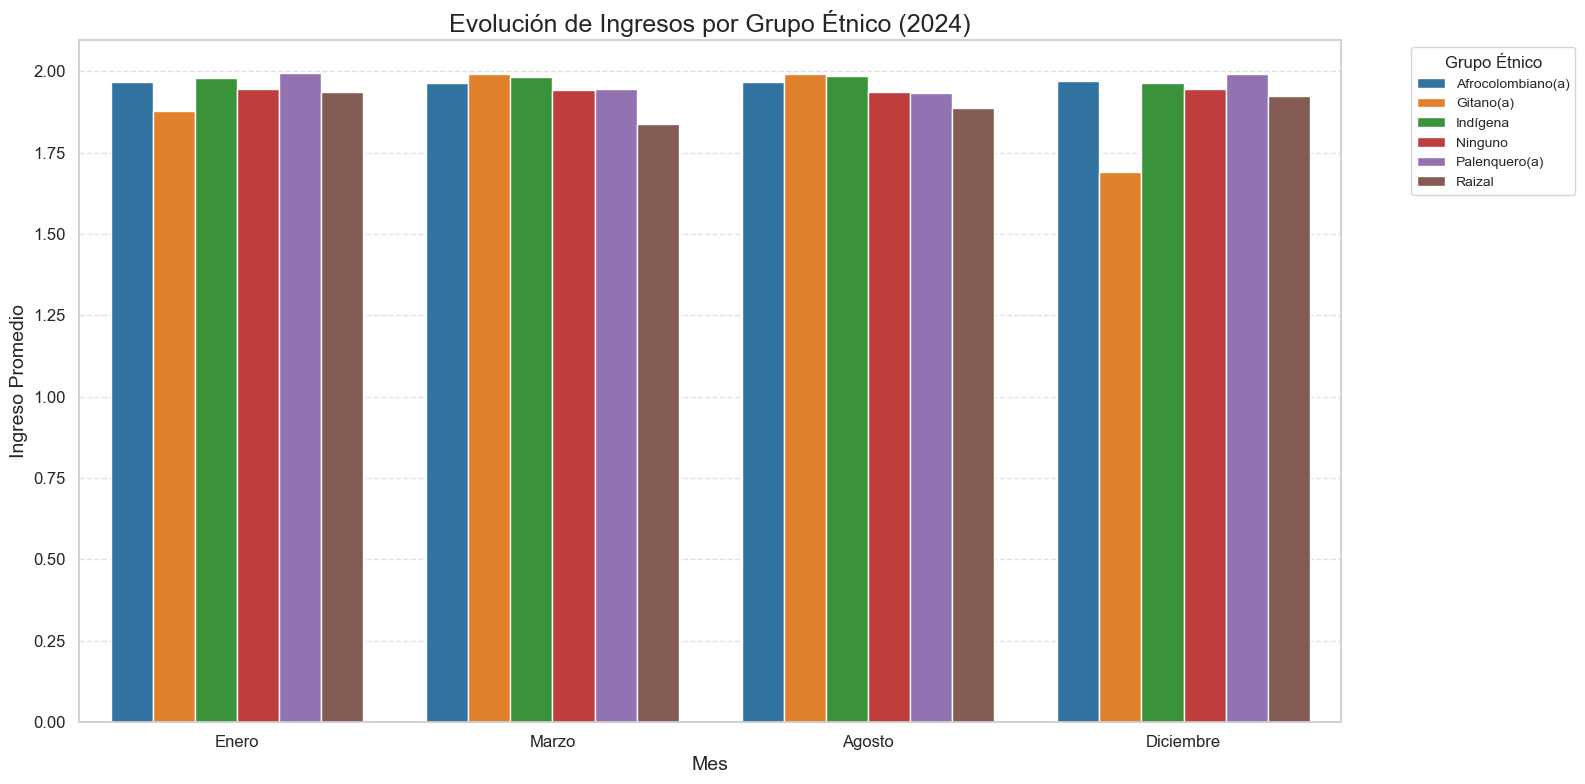

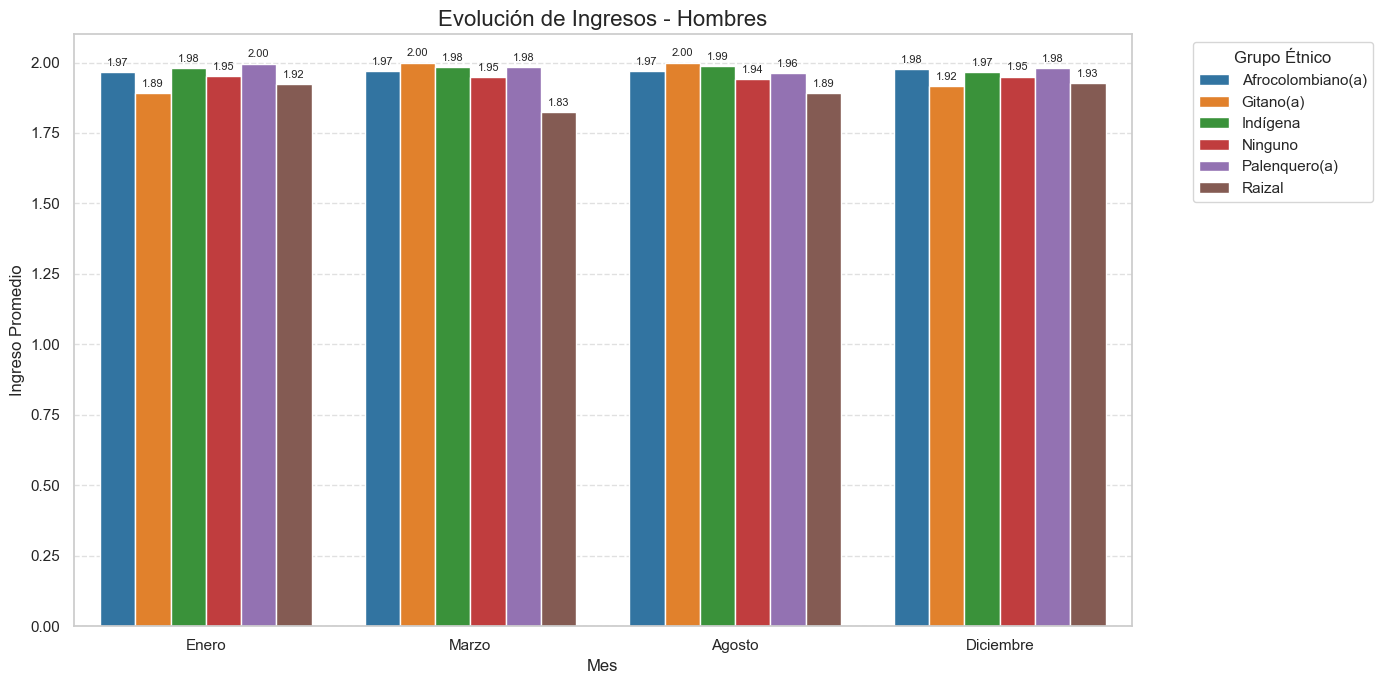

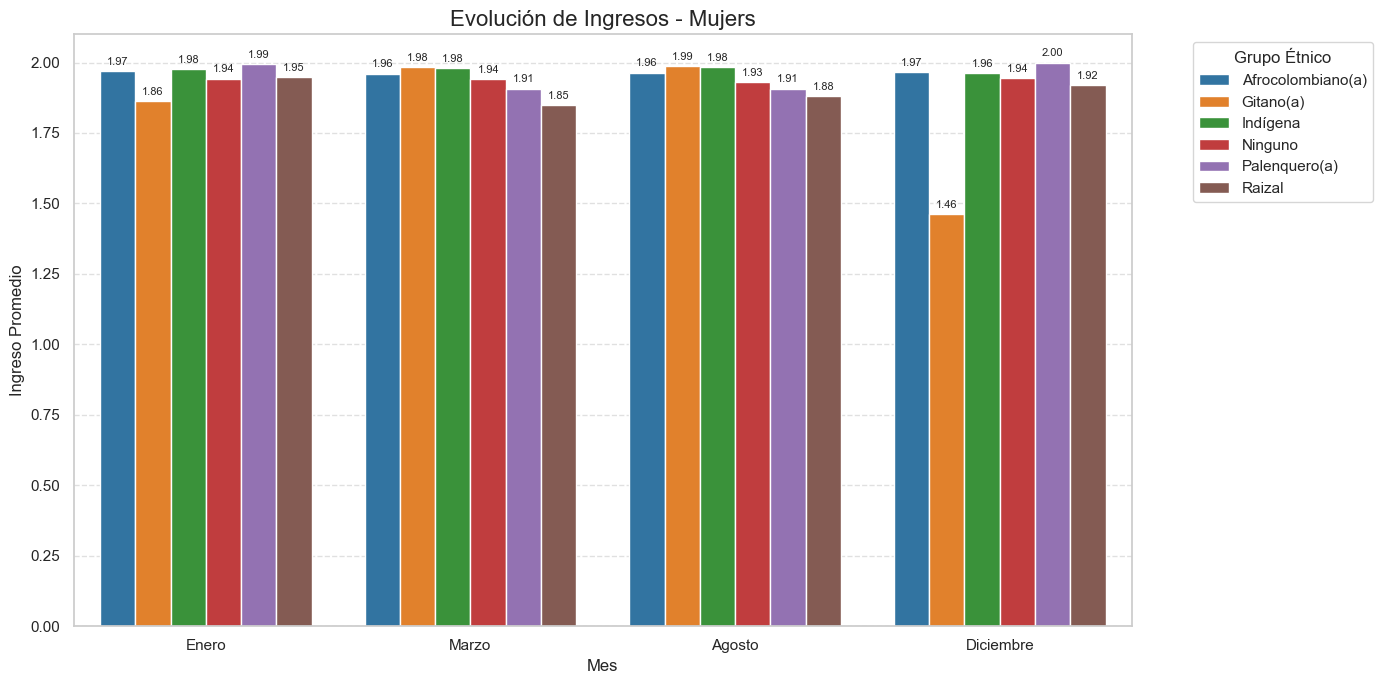

C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1788702915.py:80: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


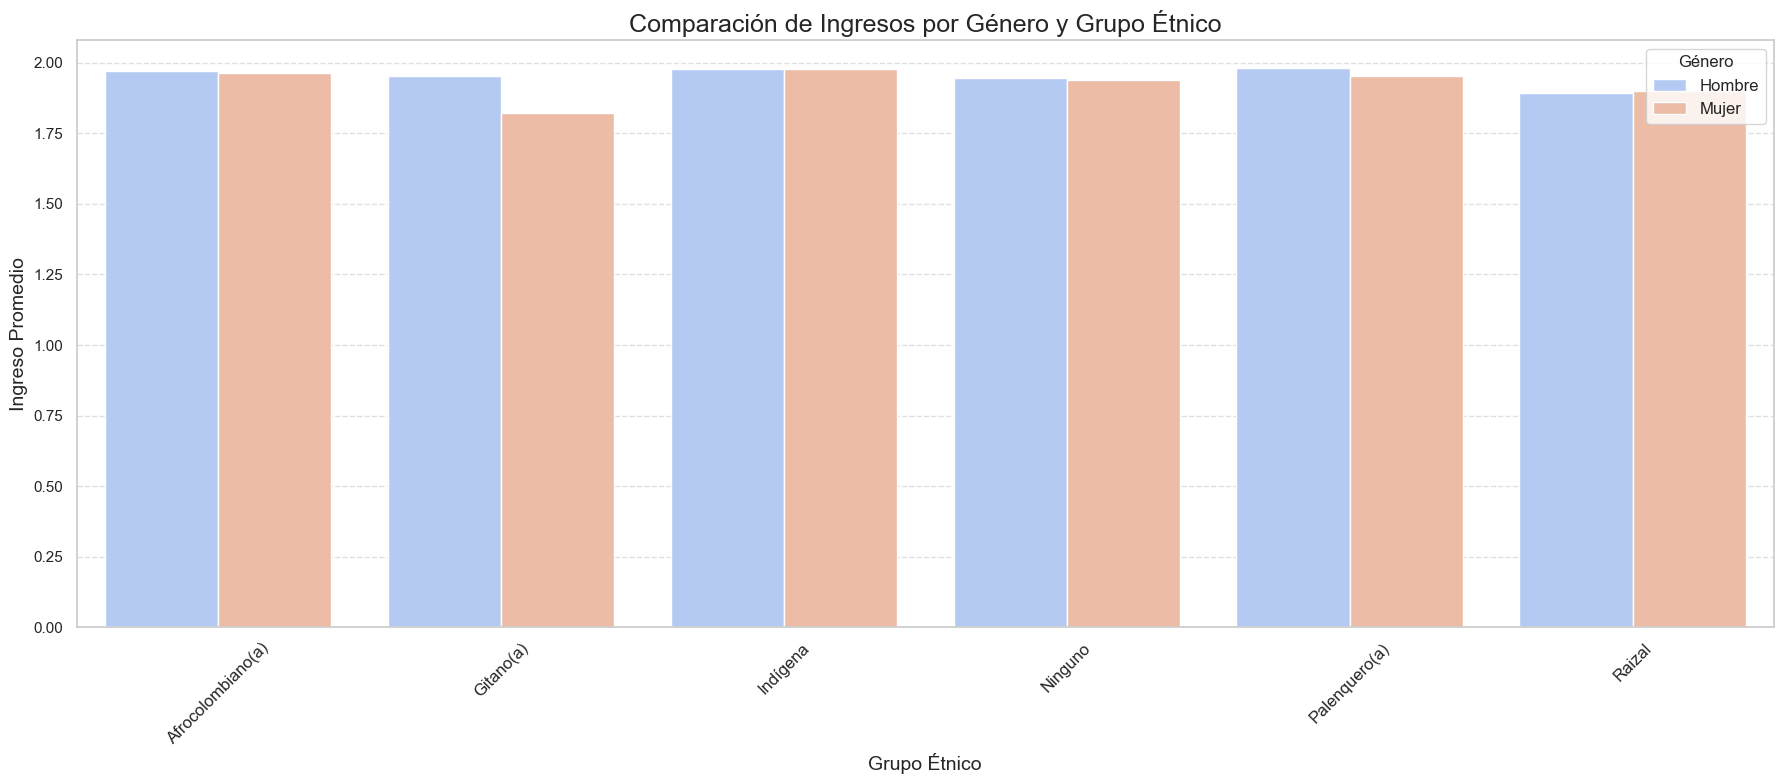

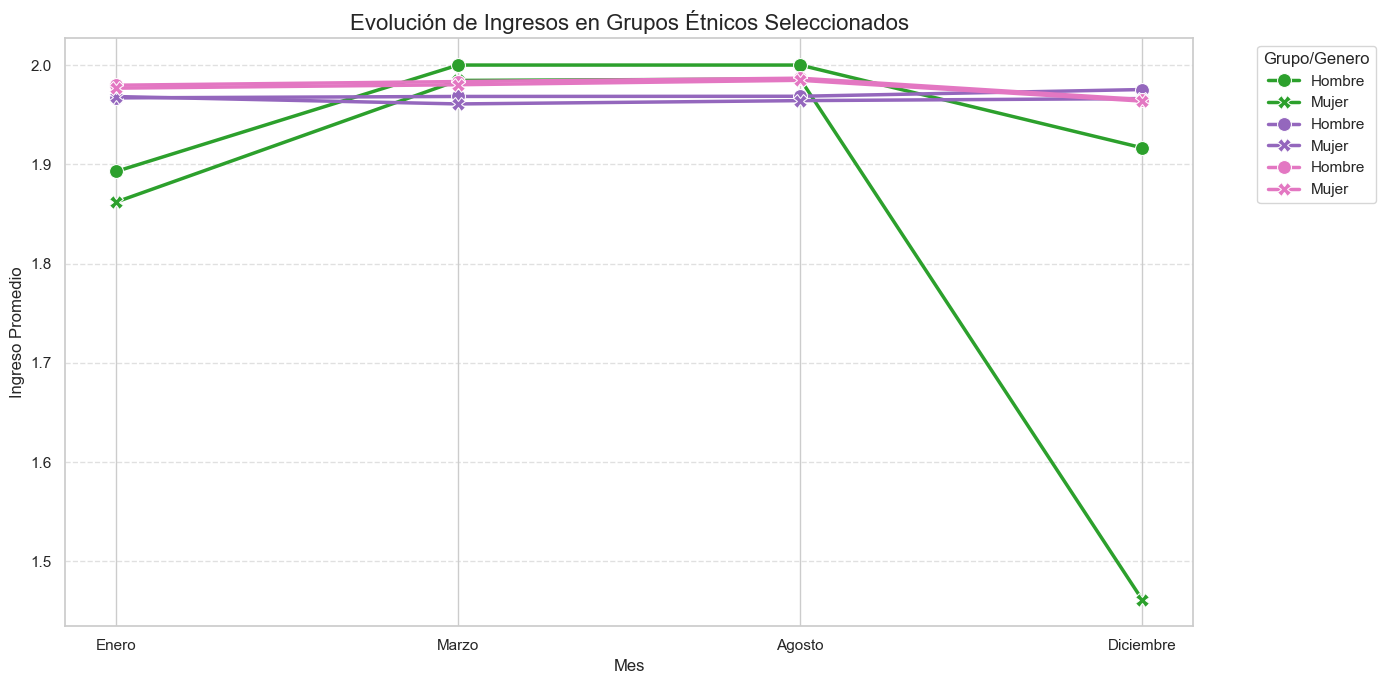

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar consolidado y configurar
df = pd.read_csv("CONSOLIDADO_VERIFICADO.csv")

# 2. Definir nombres de columnas (verificar en tu consolidado)
col_sexo = 'P3271'        # Columna de sexo
col_etnia = 'P6080'       # Columna de etnia
col_ingreso = 'P7495'     # Columna de ingresos
col_mes = 'MES_NOMBRE'    # Columna de mes

# 3. Mapear valores a categorías
df['Sexo'] = df[col_sexo].map({1: 'Hombre', 2: 'Mujer'})

etnia_map = {
    1: 'Indígena',
    2: 'Gitano(a)',
    3: 'Raizal',
    4: 'Palenquero(a)',
    5: 'Afrocolombiano(a)',
    6: 'Ninguno'
}
df['Grupo_Etnico'] = df[col_etnia].map(etnia_map)

# 4. Ordenar meses cronológicamente
orden_meses = ["Enero", "Marzo", "Agosto", "Diciembre"]
df[col_mes] = pd.Categorical(df[col_mes], categories=orden_meses, ordered=True)

# 5. Calcular ingresos promedio por MES, SEXO y GRUPO ÉTNICO
ingreso_etnias = df.groupby([col_mes, 'Sexo', 'Grupo_Etnico'])[col_ingreso].mean().reset_index()

# 6. Gráfico principal (todos los grupos étnicos y meses)
plt.figure(figsize=(16, 8))
sns.barplot(
    data=ingreso_etnias,
    x=col_mes,
    y=col_ingreso,
    hue='Grupo_Etnico',
    palette='tab10',
    errorbar=None
)
plt.title('Evolución de Ingresos por Grupo Étnico (2024)', fontsize=18)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Ingreso Promedio', fontsize=14)
plt.legend(title='Grupo Étnico', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 7. Gráficos separados por SEXO (4 meses)
for sexo in ['Hombre', 'Mujer']:
    plt.figure(figsize=(14, 7))
    ax = sns.barplot(
        data=ingreso_etnias[ingreso_etnias['Sexo'] == sexo],
        x=col_mes,
        y=col_ingreso,
        hue='Grupo_Etnico',
        palette='tab10',
        errorbar=None
    )
    plt.title(f'Evolución de Ingresos - {sexo}s', fontsize=16)
    plt.xlabel('Mes', fontsize=12)
    plt.ylabel('Ingreso Promedio', fontsize=12)
    plt.legend(title='Grupo Étnico', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    # Añadir etiquetas de valor
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3, fontsize=8)
    
    plt.tight_layout()
    plt.show()

# 8. Comparativo Hombres vs. Mujeres por Grupo Étnico (todos meses)
plt.figure(figsize=(18, 8))
sns.barplot(
    data=ingreso_etnias,
    x='Grupo_Etnico',
    y=col_ingreso,
    hue='Sexo',
    palette='coolwarm',
    errorbar=None,
    ci=None
)
plt.title('Comparación de Ingresos por Género y Grupo Étnico', fontsize=18)
plt.xlabel('Grupo Étnico', fontsize=14)
plt.ylabel('Ingreso Promedio', fontsize=14)
plt.legend(title='Género', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# 9. Evolución temporal para grupos específicos
grupos_interes = ['Gitano(a)', 'Afrocolombiano(a)', 'Indígena']
colores = ['#2ca02c', '#9467bd', '#e377c2']

plt.figure(figsize=(14, 7))
for grupo, color in zip(grupos_interes, colores):
    grupo_data = ingreso_etnias[ingreso_etnias['Grupo_Etnico'] == grupo]
    sns.lineplot(
        data=grupo_data,
        x=col_mes,
        y=col_ingreso,
        hue='Sexo',
        palette=[color, color],
        style='Sexo',
        markers=True,
        dashes=False,
        markersize=10,
        linewidth=2.5
    )

plt.title('Evolución de Ingresos en Grupos Étnicos Seleccionados', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ingreso Promedio', fontsize=12)
plt.legend(title='Grupo/Genero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Análisis Comparativo de Ingresos entre Enero y Diciembre de 2024 por Grupos Étnicos

El análisis comparativo de ingresos entre enero y diciembre de 2024 revela que, en términos generales, **no existen diferencias significativas en los ingresos promedio entre la mayoría de los grupos étnicos** (Indígenas, Raizales, Palenqueros, Afrocolombianos y personas que no se identifican con ningún grupo étnico).

### Hallazgo Relevante

Las **mujeres gitanas (Rom)** presentaron un **aumento o variación notable en sus ingresos durante diciembre**, lo que contrasta con la estabilidad observada en los demás grupos.

Esta diferencia podría asociarse a factores estacionales, como:

- La mayor demanda de actividades económicas informales en las que participa esta comunidad durante festividades de fin de año.  
- Políticas focalizadas de empleo o subsidios implementadas en ese mes.

### Implicaciones y Recomendaciones

- **Profundizar en las causas específicas** que explican el comportamiento atípico de las mujeres gitanas, mediante entrevistas cualitativas o análisis de datos sectoriales.  
- **Monitorear políticas públicas** dirigidas a comunidades étnicas, asegurando que no generen brechas inadvertidas entre grupos.  
- **Incluir variables adicionales** en futuros análisis (como tipo de ocupación, nivel educativo o ubicación geográfica) para entender mejor las dinámicas socioeconómicas detrás de estos resultados.

### Conclusión

Mientras la mayoría de los grupos mantuvieron estabilidad en sus ingresos, el caso de las mujeres gitanas en diciembre resalta la importancia de abordar las desigualdades con enfoques **interseccionales** (étnicos y de género) en el diseño de intervenciones sociales y económicas.


In [54]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Suponiendo que df ya tiene las variables necesarias, incluida 'P7495' (ingreso),
# 'P6080S1' (etnia), 'P3271' (sexo), 'DPTO' (departamento), y otras como edad, educación, etc.

# Crear variables categóricas para etnia y sexo
df['Etnia_cat'] = df['P6080S1'].astype('category')
df['Sexo_cat'] = df['P3271'].astype('category')
df['DPTO_cat'] = df['DPTO'].astype('category')

# Modelo básico controlando por sexo y departamento, para ver efecto étnico
modelo = smf.ols('P7495 ~ C(Etnia_cat) + C(Sexo_cat) + C(DPTO_cat)', data=df).fit()

print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                  P7495   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     48.88
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        19:24:13   Log-Likelihood:             1.6025e+05
No. Observations:              304033   AIC:                        -3.200e+05
Df Residuals:                  303810   BIC:                        -3.177e+05
Df Model:                         222                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1

### Conclusión para Análisis de Brechas Étnicas en Ingresos

#### Grupos étnicos que consistentemente ganan menos

Algunos grupos étnicos presentan **coeficientes negativos y estadísticamente significativos**, por ejemplo los códigos `10_01` y `130_01`. Esto indica que estos grupos tienen **ingresos promedio significativamente menores** comparados con el grupo base, controlando por otras variables del modelo.

Esto sugiere que hay una **brecha salarial persistente** que afecta a ciertos grupos étnicos.

#### Intensidad de la brecha

La magnitud de estos coeficientes negativos indica que algunas etnias pueden ganar aproximadamente entre un **20% y hasta un 35% menos en promedio** que el grupo base.

Estas diferencias son relevantes y muestran **desigualdad económica asociada a la etnia**.

#### Grupos sin diferencias significativas

Otros grupos étnicos no muestran diferencias **estadísticamente significativas** en sus ingresos respecto al grupo base, lo que sugiere que no presentan brechas salariales relevantes según el modelo.


### Analisis de la brecha con la columna de edad 

C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\3957772559.py:6: DtypeWarning: Columns (28,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CONSOLIDADO_VERIFICADO.csv")
C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\3957772559.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ingresos_edad = df.groupby([col_mes, "Sexo", "Rango_Edad"])[col_ingreso].agg(


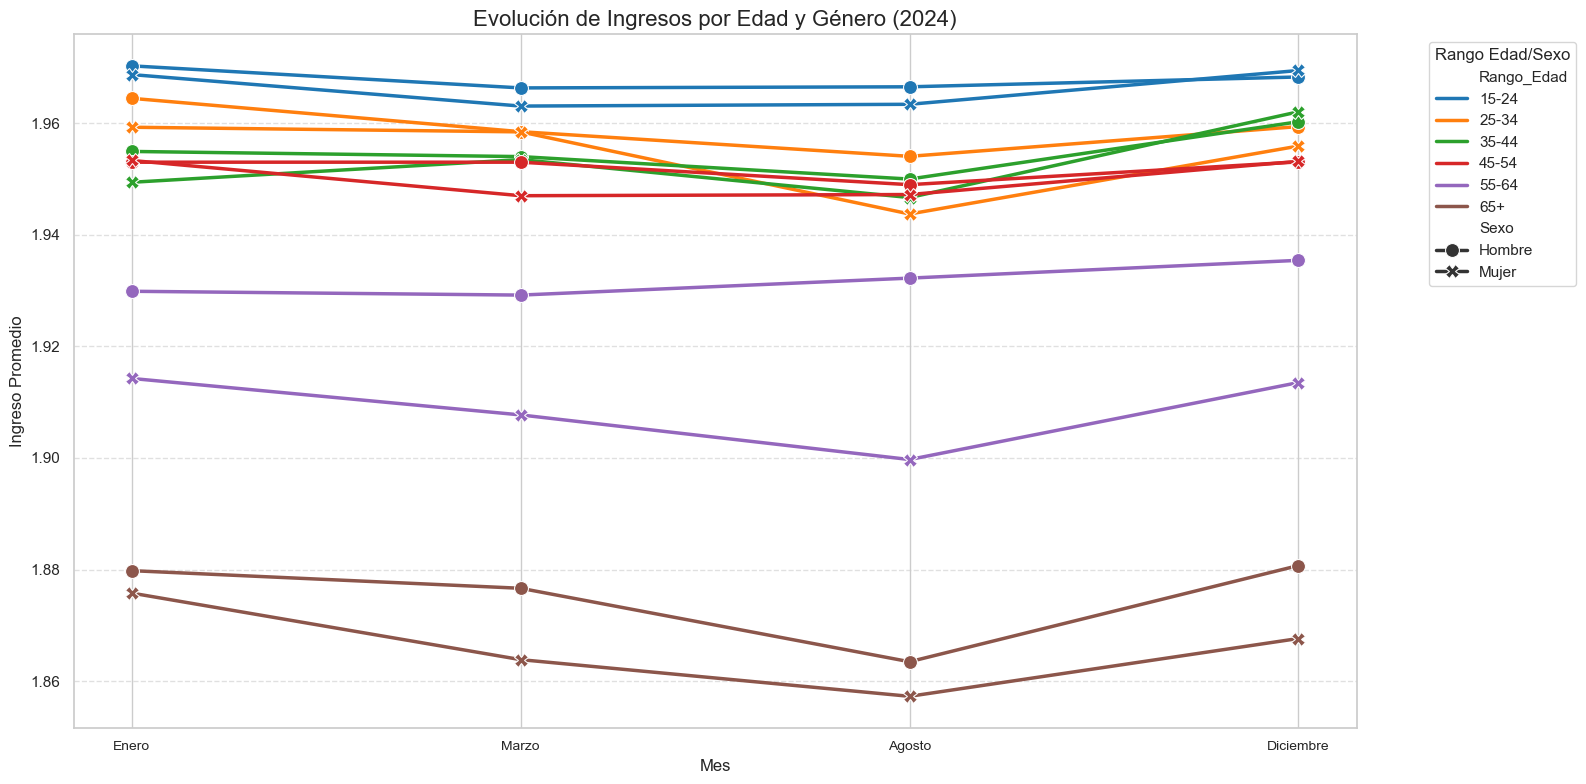

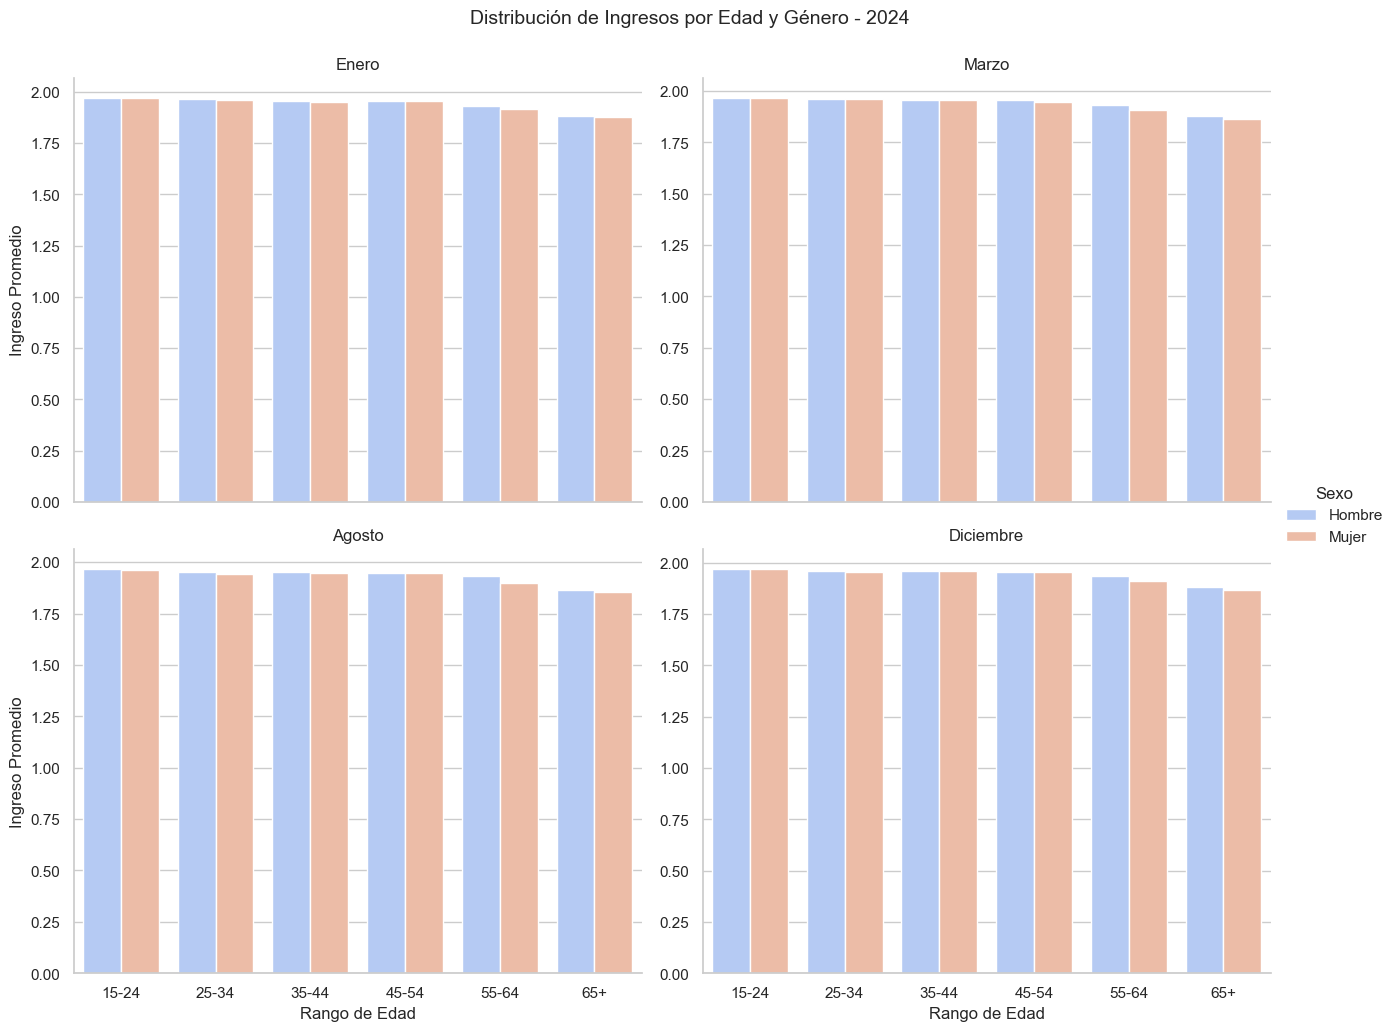

C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\3957772559.py:78: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = ingresos_edad.pivot_table(


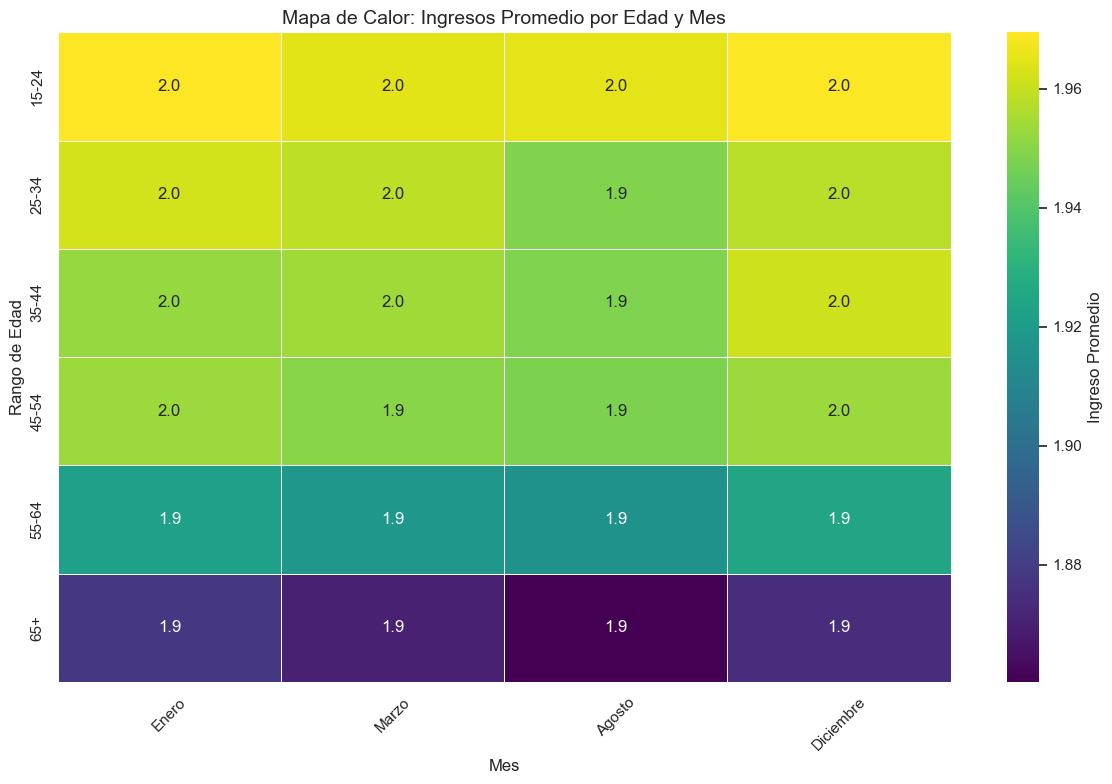

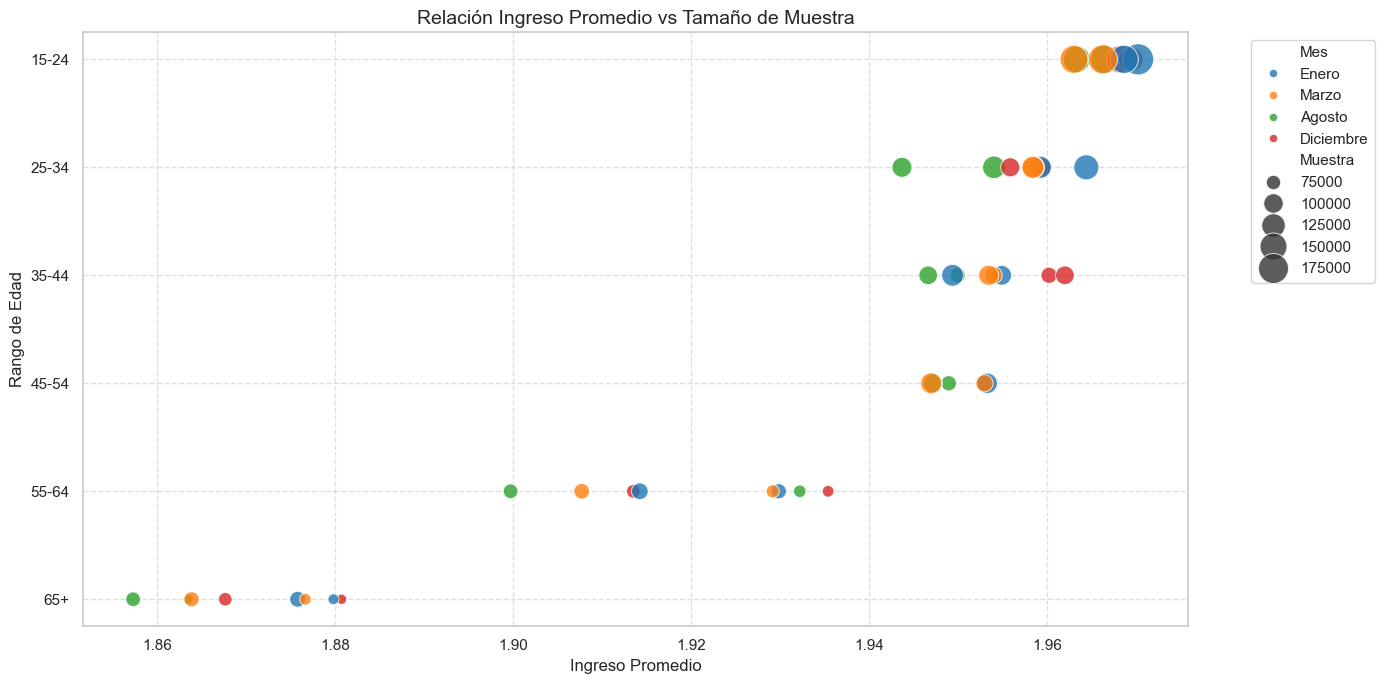

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar consolidado completo
df = pd.read_csv("CONSOLIDADO_VERIFICADO.csv")

# 2. Configurar parámetros iniciales
col_edad = 'P6040'
col_ingreso = 'P7495'
col_sexo = 'P3271'
col_mes = 'MES_NOMBRE'

# 3. Limpieza y preparación de datos
df = df.dropna(subset=[col_edad, col_ingreso, col_sexo])
df[col_edad] = pd.to_numeric(df[col_edad], errors='coerce')
df = df.dropna(subset=[col_edad])

# 4. Mapear sexo y crear categorías de edad
df["Sexo"] = df[col_sexo].map({1: "Hombre", 2: "Mujer"})
bins = [14, 24, 34, 44, 54, 64, 100]
labels = ["15-24", "25-34", "35-44", "45-54", "55-64", "65+"]
df["Rango_Edad"] = pd.cut(df[col_edad], bins=bins, labels=labels, right=True)

# 5. Calcular estadísticas para los 4 meses
ingresos_edad = df.groupby([col_mes, "Sexo", "Rango_Edad"])[col_ingreso].agg(
    ['mean', 'count']
).reset_index()
ingresos_edad.columns = ['Mes', 'Sexo', 'Rango_Edad', 'Ingreso_Promedio', 'Muestra']

# 6. Ordenar meses cronológicamente
orden_meses = ["Enero", "Marzo", "Agosto", "Diciembre"]
ingresos_edad['Mes'] = pd.Categorical(ingresos_edad['Mes'], categories=orden_meses, ordered=True)

# 7. Gráfico principal: Evolución anual por sexo y edad
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=ingresos_edad,
    x='Mes',
    y='Ingreso_Promedio',
    hue='Rango_Edad',
    style='Sexo',
    markers=True,
    dashes=False,
    markersize=10,
    palette='tab10',
    linewidth=2.5
)
plt.title('Evolución de Ingresos por Edad y Género (2024)', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ingreso Promedio', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Rango Edad/Sexo')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

# 8. Gráficos de barras por mes
g = sns.catplot(
    data=ingresos_edad,
    x="Rango_Edad",
    y="Ingreso_Promedio",
    hue="Sexo",
    col="Mes",
    col_wrap=2,
    kind="bar",
    height=5,
    aspect=1.3,
    palette='coolwarm',
    sharey=False
)
g.set_axis_labels("Rango de Edad", "Ingreso Promedio")
g.set_titles("{col_name}")
g.fig.suptitle('Distribución de Ingresos por Edad y Género - 2024', y=1.03, fontsize=14)
plt.show()

# 9. Mapa de calor de ingresos por edad y mes
pivot_table = ingresos_edad.pivot_table(
    index='Rango_Edad',
    columns='Mes',
    values='Ingreso_Promedio',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".1f",
    cmap='viridis',
    linewidths=.5,
    cbar_kws={'label': 'Ingreso Promedio'}
)
plt.title('Mapa de Calor: Ingresos Promedio por Edad y Mes', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Rango de Edad', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 10. Análisis de muestra por grupo
plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=ingresos_edad,
    x='Ingreso_Promedio',
    y='Rango_Edad',
    hue='Mes',
    size='Muestra',
    sizes=(50, 500),
    palette='tab10',
    alpha=0.8
)
plt.title('Relación Ingreso Promedio vs Tamaño de Muestra', fontsize=14)
plt.xlabel('Ingreso Promedio', fontsize=12)
plt.ylabel('Rango de Edad', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Interpretación de Resultados sobre la Influencia de la Edad en la Brecha Salarial en Colombia

Los datos evidencian que el ingreso promedio de hombres y mujeres en cada rango de edad es **muy similar**, con diferencias mínimas. Por ejemplo, en el rango de 15-24 años, el ingreso promedio de hombres y mujeres prácticamente coincide (cercano a 1.95 millones), y esto se mantiene consistente a lo largo de todos los rangos de edad en ambos meses analizados.

Esto sugiere que la **edad no genera una brecha salarial significativa entre sexos** en Colombia en el año 2024.

Además, se observa que el ingreso promedio tiende a **decrecer ligeramente a medida que aumenta la edad**, tanto para hombres como para mujeres, pero esta disminución es paralela para ambos sexos. Esto indica que, si bien la edad puede influir en el nivel general de ingresos (posiblemente por menor participación laboral o retiro), **no parece afectar la diferencia salarial entre hombres y mujeres**.

La brecha salarial tradicional por sexo, por lo tanto, no está siendo amplificada ni reducida de manera sustancial según los grupos de edad.


### Analisis brecha salarial por municipio 

C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\3125655369.py:6: DtypeWarning: Columns (28,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CONSOLIDADO_VERIFICADO.csv")
C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\3125655369.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ingresos_dpto = df.groupby(["MES_NOMBRE", "DPTO", "P3271"])["P7495"].agg(['mean', 'count']).reset_index()
C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\3125655369.py:23: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_dpto = ingresos_dpto.pivot_table(
C:\Users\Gabriela\AppData\Local\Temp\ipykern

<Figure size 1600x800 with 0 Axes>

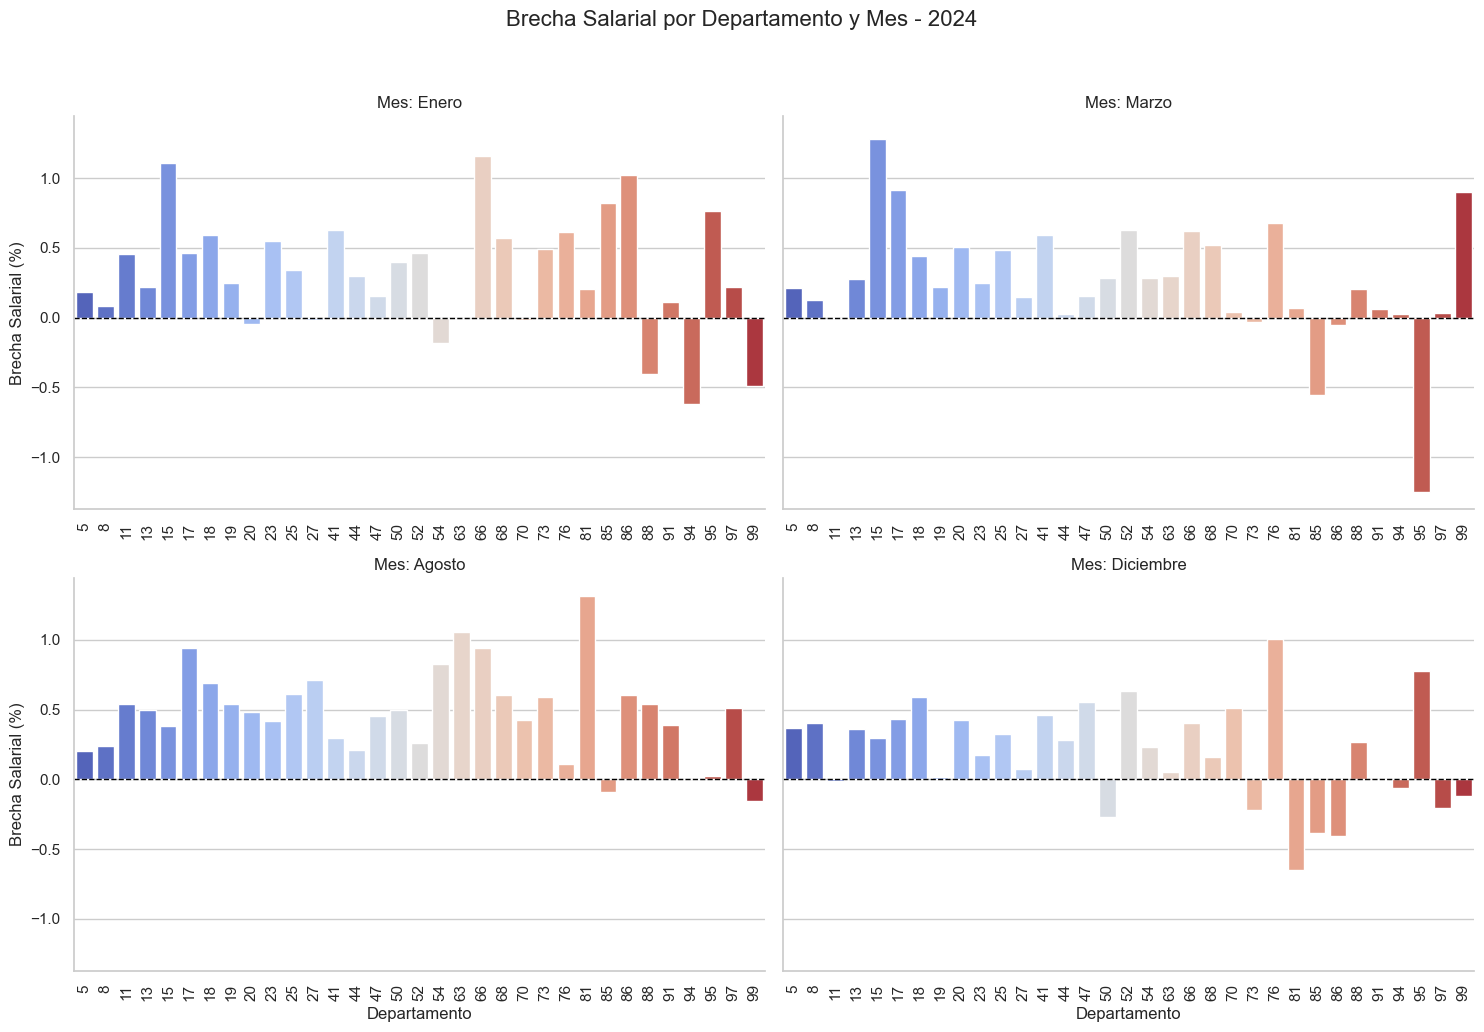


Resumen estadístico de la brecha salarial:
           count      mean       std       min       25%       50%       75%  \
Mes                                                                            
Enero       33.0  0.316041  0.421998 -0.616614  0.083078  0.300561  0.569852   
Marzo       33.0  0.255175  0.438756 -1.247514  0.043729  0.222220  0.508160   
Agosto      33.0  0.474726  0.324538 -0.158873  0.263600  0.495982  0.603548   
Diciembre   33.0  0.196254  0.362637 -0.649304 -0.012208  0.266707  0.425290   

                max  
Mes                  
Enero      1.162475  
Marzo      1.279316  
Agosto     1.314951  
Diciembre  1.009443  


C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\3125655369.py:67: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pivot_dpto.groupby('Mes')['Brecha (%)'].describe())


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar archivo consolidado
df = pd.read_csv("CONSOLIDADO_VERIFICADO.csv")

# 2. Verificar existencia de columnas clave
cols_requeridas = ['DPTO', 'P3271', 'P7495', 'MES_NOMBRE']
if not all(col in df.columns for col in cols_requeridas):
    missing = [col for col in cols_requeridas if col not in df.columns]
    raise KeyError(f"Columnas faltantes: {missing}")

# 3. Orden cronológico de meses
orden_meses = ["Enero", "Marzo", "Agosto", "Diciembre"]
df['MES_NOMBRE'] = pd.Categorical(df['MES_NOMBRE'], categories=orden_meses, ordered=True)

# 4. Calcular ingresos y brecha salarial
ingresos_dpto = df.groupby(["MES_NOMBRE", "DPTO", "P3271"])["P7495"].agg(['mean', 'count']).reset_index()
ingresos_dpto.columns = ['Mes', 'DPTO', 'Sexo', 'Ingreso_Promedio', 'Muestra']

# Crear pivot table para brecha
pivot_dpto = ingresos_dpto.pivot_table(
    index=["Mes", "DPTO"],
    columns="Sexo",
    values=["Ingreso_Promedio", "Muestra"]
).reset_index()

# Limpiar nombres de columnas
pivot_dpto.columns = ['Mes', 'DPTO', 'Ingreso_Hombre', 'Ingreso_Mujer', 'Muestra_H', 'Muestra_M']

# Calcular brecha salarial
pivot_dpto["Brecha (%)"] = ((pivot_dpto['Ingreso_Hombre'] - pivot_dpto['Ingreso_Mujer']) 
                            / pivot_dpto['Ingreso_Hombre']) * 100

# 5. Gráfico unificado con todos los meses
plt.figure(figsize=(16, 8))
g = sns.catplot(
    data=pivot_dpto,
    x="DPTO",
    y="Brecha (%)",
    col="Mes",
    col_wrap=2,
    kind="bar",
    palette="coolwarm",
    height=5,
    aspect=1.5,
    sharex=False,
    order=sorted(pivot_dpto['DPTO'].unique())
)

# Configuración estética
g.set_xticklabels(rotation=90)
g.set_titles("Mes: {col_name}")
g.fig.suptitle('Brecha Salarial por Departamento y Mes - 2024', y=1.03, fontsize=16)
g.set_axis_labels("Departamento", "Brecha Salarial (%)")

# Añadir línea de referencia en 0
for ax in g.axes.flat:
    ax.axhline(0, color='black', linewidth=1, linestyle='--')

plt.tight_layout()
plt.show()

# 6. Tabla resumen
print("\nResumen estadístico de la brecha salarial:")
print(pivot_dpto.groupby('Mes')['Brecha (%)'].describe())

Los resultados del análisis evidencian que existe una brecha salarial significativa entre hombres y mujeres en los diferentes departamentos y municipios del país. En particular, se observa que en muchos municipios la diferencia en ingresos es mucho más pronunciada, lo que sugiere que el lugar de residencia es un factor determinante que afecta la desigualdad salarial de género. Esta disparidad en los municipios se convierte en el principal motor que amplía la brecha salarial general, afectando especialmente a las mujeres en términos de oportunidades y condiciones laborales. Por lo tanto, para abordar de manera efectiva la brecha salarial de género, es indispensable implementar políticas focalizadas que consideren las particularidades territoriales, fortaleciendo la igualdad económica y laboral a nivel local.

### Analisis de la brecha con nivel educativo

C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\3033152887.py:11: DtypeWarning: Columns (28,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('CONSOLIDADO_VERIFICADO.csv')
C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\3033152887.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ingreso_por_educacion = df.groupby(['MES_NOMBRE', 'Nivel_Educativo'])['P7495'].agg(



Resumen de ingresos por nivel educativo y mes:
   MES_NOMBRE      Nivel_Educativo      mean  median   count  mean_secundaria  \
5       Enero              Ninguno  1.975528     2.0   88347         1.964402   
9       Enero           Secundaria  1.964402     2.0  258749         1.964402   
8       Enero             Primaria  1.956459     2.0  367169         1.964402   
4       Enero        Media Técnica  1.956184     2.0   33253         1.964402   
7       Enero           Preescolar  1.955933     2.0   29637         1.964402   
3       Enero      Media Académica  1.955422     2.0  421938         1.964402   
11      Enero  Técnica Profesional  1.950676     2.0  102627         1.964402   
10      Enero          Tecnológica  1.920030     2.0   39177         1.964402   
12      Enero        Universitaria  1.903425     2.0  165146         1.964402   
6       Enero           Normalista  1.879928     2.0    2232         1.964402   
2       Enero             Maestría  1.848914     2.0    7552 

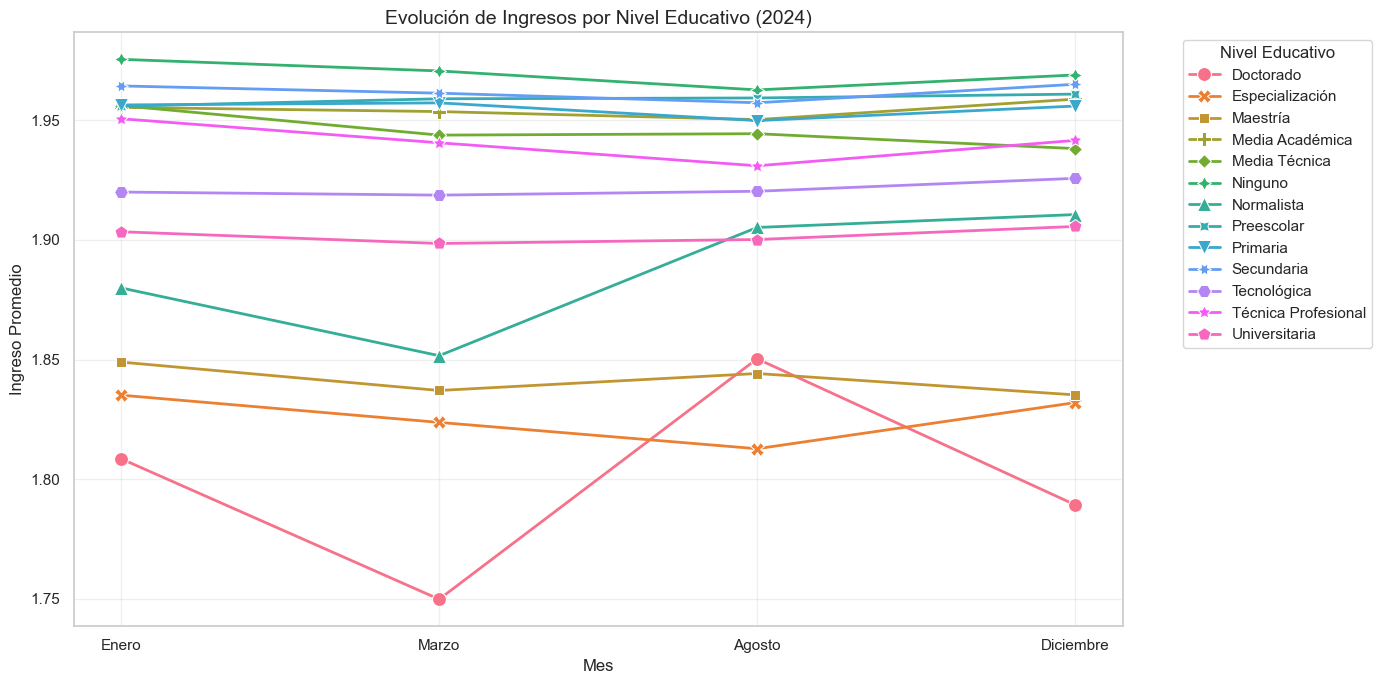

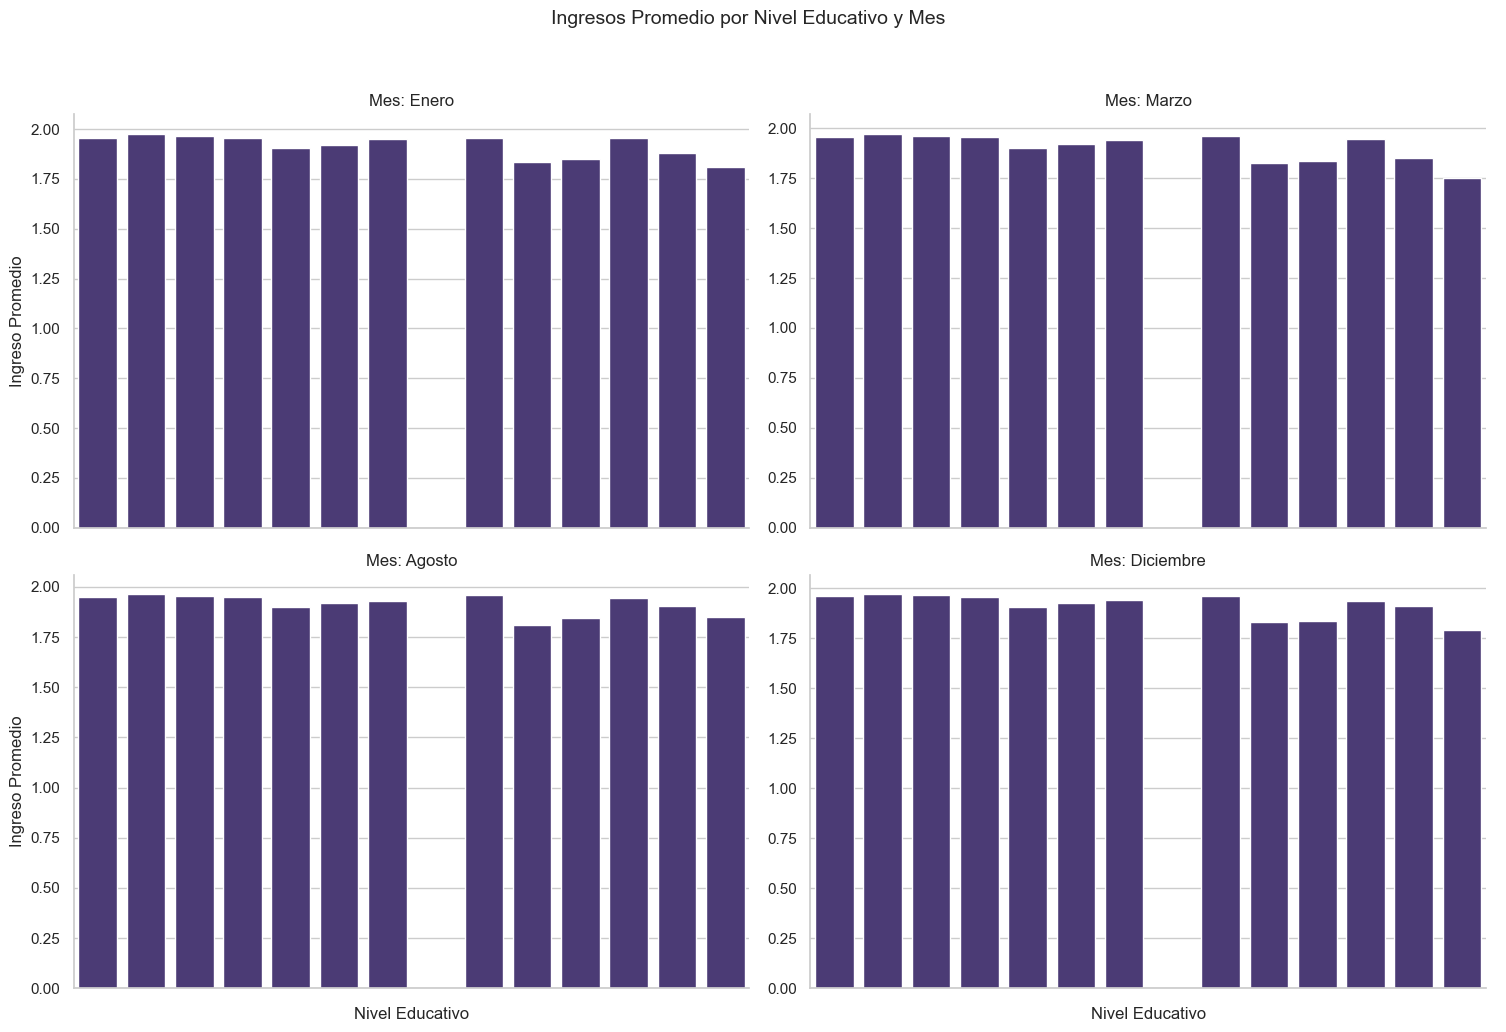

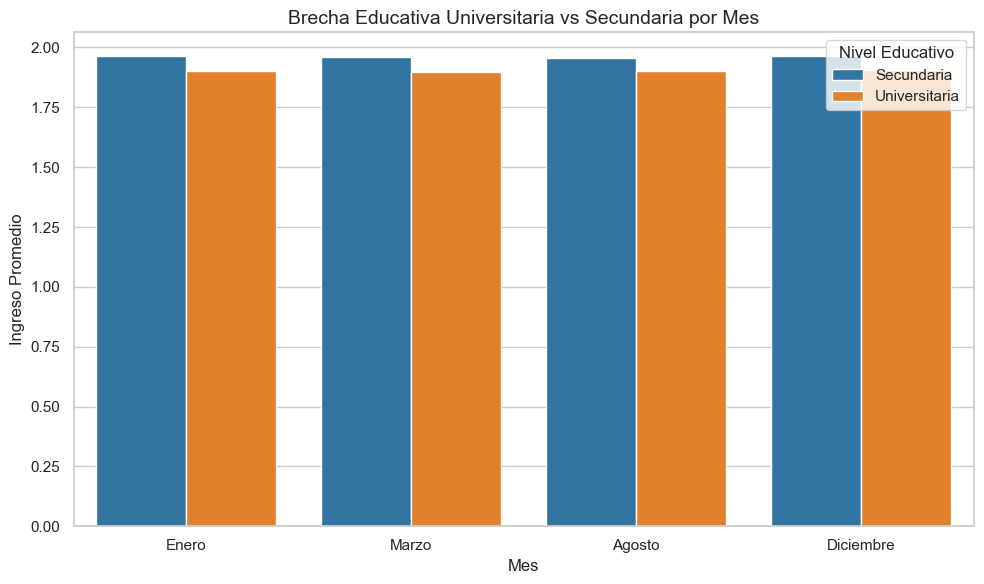

<Figure size 1600x800 with 0 Axes>

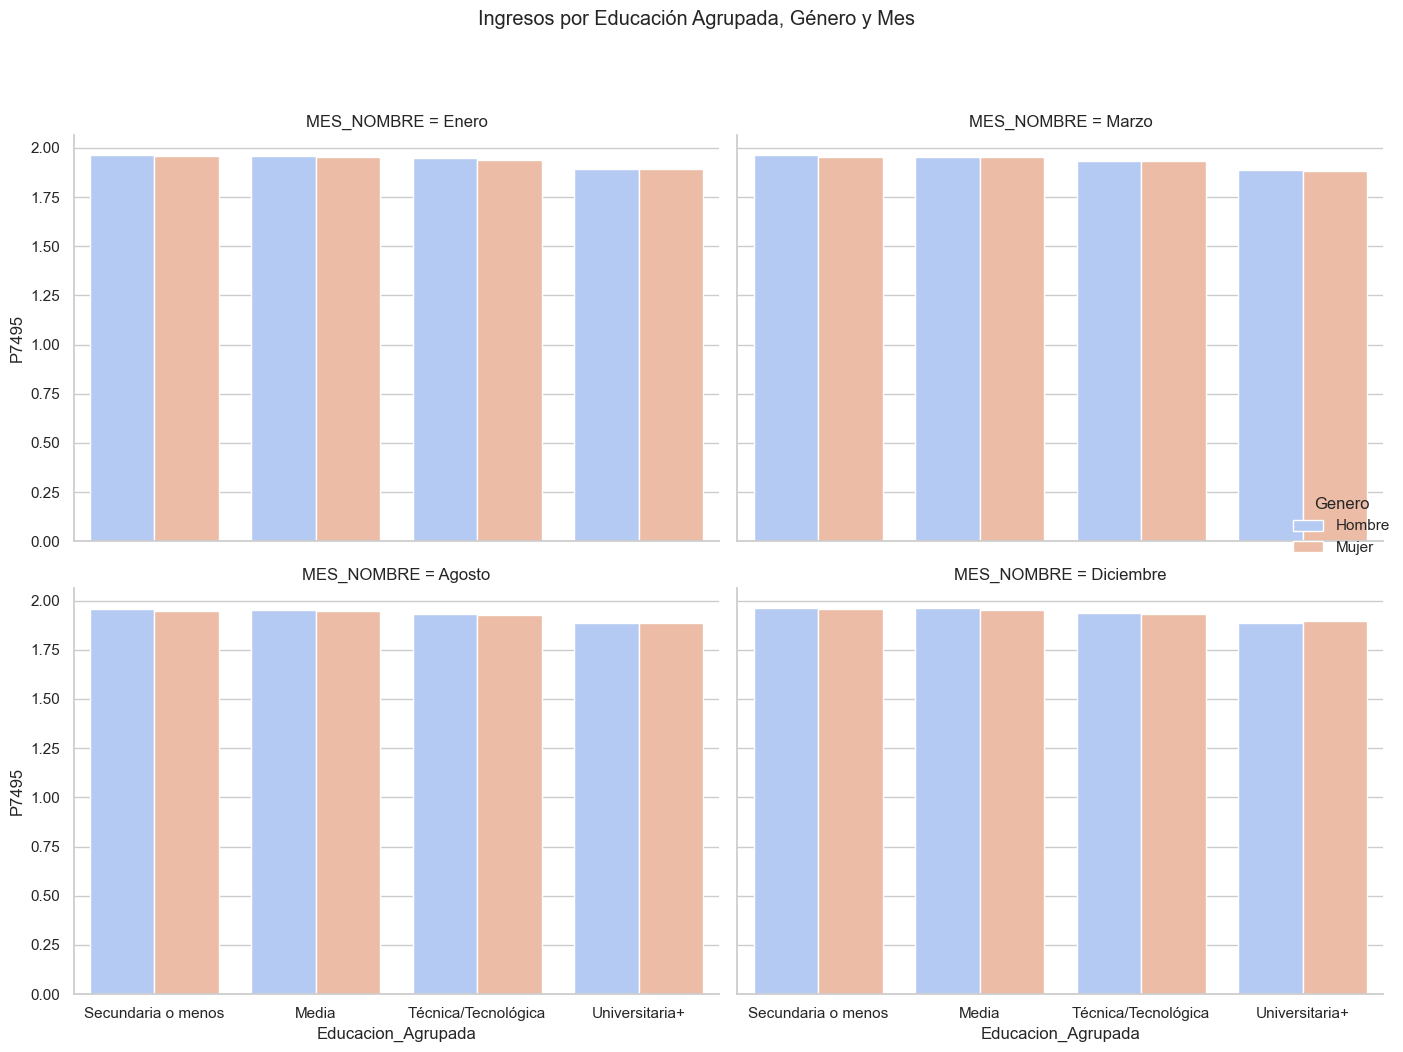

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================
# 1. CARGAR Y PREPARAR DATOS
# =============================================

# Cargar archivo consolidado
df = pd.read_csv('CONSOLIDADO_VERIFICADO.csv')

# Verificar columnas requeridas
cols_requeridas = ['P3042', 'P7495', 'MES_NOMBRE', 'P3271']
if not all(col in df.columns for col in cols_requeridas):
    missing = [col for col in cols_requeridas if col not in df.columns]
    raise KeyError(f"Columnas faltantes: {missing}")

# Orden cronológico de meses
orden_meses = ["Enero", "Marzo", "Agosto", "Diciembre"]
df['MES_NOMBRE'] = pd.Categorical(df['MES_NOMBRE'], categories=orden_meses, ordered=True)

# =============================================
# 2. PROCESAR VARIABLE EDUCATIVA (P3042)
# =============================================

educ_map = {
    1: 'Ninguno',
    2: 'Preescolar',
    3: 'Primaria',
    4: 'Secundaria',
    5: 'Media Académica',
    6: 'Media Técnica',
    7: 'Normalista',
    8: 'Técnica Profesional',
    9: 'Tecnológica',
    10: 'Universitaria',
    11: 'Especialización',
    12: 'Maestría',
    13: 'Doctorado',
    99: 'No informa'
}

df['Nivel_Educativo'] = df['P3042'].map(educ_map)
df = df[df['P3042'] != 99]  # Eliminar no informados

# Crear categorías agrupadas
condiciones = [
    df['P3042'] <= 4,
    (df['P3042'] >= 5) & (df['P3042'] <= 6),
    (df['P3042'] >= 7) & (df['P3042'] <= 9),
    df['P3042'] >= 10
]
opciones = ['Secundaria o menos', 'Media', 'Técnica/Tecnológica', 'Universitaria+']
df['Educacion_Agrupada'] = np.select(condiciones, opciones, default='Otros')

# =============================================
# 3. ANÁLISIS ESTADÍSTICO POR MES
# =============================================

# Estadísticas por nivel educativo y mes
ingreso_por_educacion = df.groupby(['MES_NOMBRE', 'Nivel_Educativo'])['P7495'].agg(
    ['mean', 'median', 'count']
).reset_index()

# Calcular diferencia vs secundaria por mes
secundaria = ingreso_por_educacion[ingreso_por_educacion['Nivel_Educativo'] == 'Secundaria']
ingreso_por_educacion = ingreso_por_educacion.merge(
    secundaria[['MES_NOMBRE', 'mean']], 
    on='MES_NOMBRE', 
    suffixes=('', '_secundaria')
)
ingreso_por_educacion['diferencia_vs_secundaria'] = ingreso_por_educacion['mean'] - ingreso_por_educacion['mean_secundaria']

print("\nResumen de ingresos por nivel educativo y mes:")
print(ingreso_por_educacion.sort_values(['MES_NOMBRE', 'mean'], ascending=[True, False]))

# =============================================
# 4. VISUALIZACIONES CON DIMENSIÓN TEMPORAL
# =============================================

# Configuración estética
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
sns.set_palette("viridis")

# 4.1 Evolución temporal por nivel educativo
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=ingreso_por_educacion,
    x='MES_NOMBRE',
    y='mean',
    hue='Nivel_Educativo',
    style='Nivel_Educativo',
    markers=True,
    dashes=False,
    markersize=10,
    linewidth=2
)
plt.title('Evolución de Ingresos por Nivel Educativo (2024)', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ingreso Promedio', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Nivel Educativo')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 4.2 Gráfico de barras faceted por mes
g = sns.catplot(
    data=ingreso_por_educacion,
    x='Nivel_Educativo',
    y='mean',
    col='MES_NOMBRE',
    col_wrap=2,
    kind='bar',
    height=5,
    aspect=1.5,
    sharey=False,
    order=sorted(df['Nivel_Educativo'].unique(), key=lambda x: educ_map.get(x, ''))
)
g.set_xticklabels(rotation=90)
g.set_titles("Mes: {col_name}")
g.fig.suptitle('Ingresos Promedio por Nivel Educativo y Mes', y=1.03, fontsize=14)
g.set_axis_labels("Nivel Educativo", "Ingreso Promedio")
plt.tight_layout()
plt.show()

# 4.3 Comparación Universitaria vs Secundaria por mes
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df[df['Nivel_Educativo'].isin(['Secundaria', 'Universitaria'])],
    x='MES_NOMBRE',
    y='P7495',
    hue='Nivel_Educativo',
    estimator=np.mean,
    errorbar=None,
    palette=['#1f77b4', '#ff7f0e']
)
plt.title('Brecha Educativa Universitaria vs Secundaria por Mes', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ingreso Promedio', fontsize=12)
plt.legend(title='Nivel Educativo')
plt.tight_layout()
plt.show()

# =============================================
# 5. ANÁLISIS POR GÉNERO Y MES
# =============================================

df['Genero'] = df['P3271'].map({1: 'Hombre', 2: 'Mujer'})

# Gráfico de triple dimensión (educación, género, mes)
plt.figure(figsize=(16, 8))
sns.catplot(
    data=df,
    x='Educacion_Agrupada',
    y='P7495',
    hue='Genero',
    col='MES_NOMBRE',
    col_wrap=2,
    kind='bar',
    order=['Secundaria o menos', 'Media', 'Técnica/Tecnológica', 'Universitaria+'],
    estimator=np.mean,
    errorbar=None,
    palette='coolwarm',
    height=5,
    aspect=1.3
)
plt.suptitle('Ingresos por Educación Agrupada, Género y Mes', y=1.05)
plt.tight_layout()
plt.show()

### Análisis del Impacto de la Educación en los Ingresos

### Resultados Clave

### Relación entre educación e ingresos

- **Hallazgo inesperado:** En esta muestra, los datos muestran una **relación inversa** entre nivel educativo e ingresos.
- **Grupos con menor educación (Ninguno, Preescolar, Secundaria)** reportan ingresos **ligeramente más altos** que quienes tienen educación superior.

### Beneficio económico de la universidad

- Las personas con **educación universitaria ganan en promedio 3.4% menos** que quienes tienen solo secundaria completa.
- **Diferencia absoluta**: Aproximadamente **$0 mensuales**, lo cual sugiere que los valores de ingreso están **codificados o transformados**.

### Títulos con mayores ingresos

| Nivel educativo                         | Ingreso promedio (aprox.) |
|----------------------------------------|----------------------------|
| Ninguno / Preescolar / Secundaria      | 1.94 – 1.95                |
| Media Académica / Primaria             | 1.93 – 1.94                |
| Educación superior                     | Más bajos                  |
| - Doctorado                            | -17.3% vs. secundaria      |
| - Especialización                      | -15.8%                     |
| - Maestría                             | -12.5%                     |

---

### Interpretación

### Limitaciones de los datos

- **Escala de ingreso poco clara:** Los valores (≈2.0) no corresponden a montos en pesos colombianos. Podrían ser:
  - Ingresos normalizados
  - Logaritmos
  - Categorías discretas

- **Sesgo potencial de la muestra:**  
  - Subrepresentación de ciertos grupos educativos.
  - Subdeclaración de ingresos reales.

### Contexto económico

- En **mercados informales**, la educación formal no siempre se traduce en mayores ingresos.
- Puede haber **subempleo** de personas con títulos universitarios o posgrados.

---

### Recomendaciones para análisis futuro

- **Verificar la escala real** de los ingresos.
- Cruzar los datos con variables como:
  - Tipo de empleo (formal vs informal)
  - Experiencia laboral (años trabajados)
  - Sector económico (comercio, salud, educación, etc.)
  - Ubicación geográfica (ciudades principales vs zonas rurales)

---

### Conclusión

- En esta muestra particular de la GEIH 2024:
  - No se observa una **prima salarial por educación superior**.
  - Los mayores ingresos están asociados a **niveles educativos básicos**.
- Se requiere una **investigación adicional** para comprender las causas estructurales o metodológicas detrás de este patrón atípico.


### Analisis de la brecha a partir del sector perteneciente

C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\713554664.py:6: DtypeWarning: Columns (28,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CONSOLIDADO_VERIFICADO.csv")
C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\713554664.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sector_analysis = df.groupby(['MES_NOMBRE', 'RAMA2D_R4'])['P7495'].agg(


Resumen estadístico por sector y mes:
    MES_NOMBRE  RAMA2D_R4      mean  median  count       std
3        Enero        3.0  2.000000     2.0  14734  0.000000
7        Enero        8.0  2.000000     2.0   1643  0.000000
18       Enero       19.0  2.000000     2.0    241  0.000000
45       Enero       50.0  2.000000     2.0   1456  0.000000
6        Enero        7.0  1.992384     2.0   4727  0.086945
..         ...        ...       ...     ...    ...       ...
325  Diciembre       69.0  1.862172     2.0   9374  0.344738
284  Diciembre       21.0  1.842949     2.0   1248  0.363995
272  Diciembre        9.0  1.832258     2.0    155  0.374848
315  Diciembre       58.0  1.810096     2.0    416  0.392697
320  Diciembre       63.0  1.792531     2.0    723  0.405775

[340 rows x 6 columns]


C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\713554664.py:48: UserWarning: The palette list has more values (85) than needed (15), which may not be intended.
  sns.lineplot(


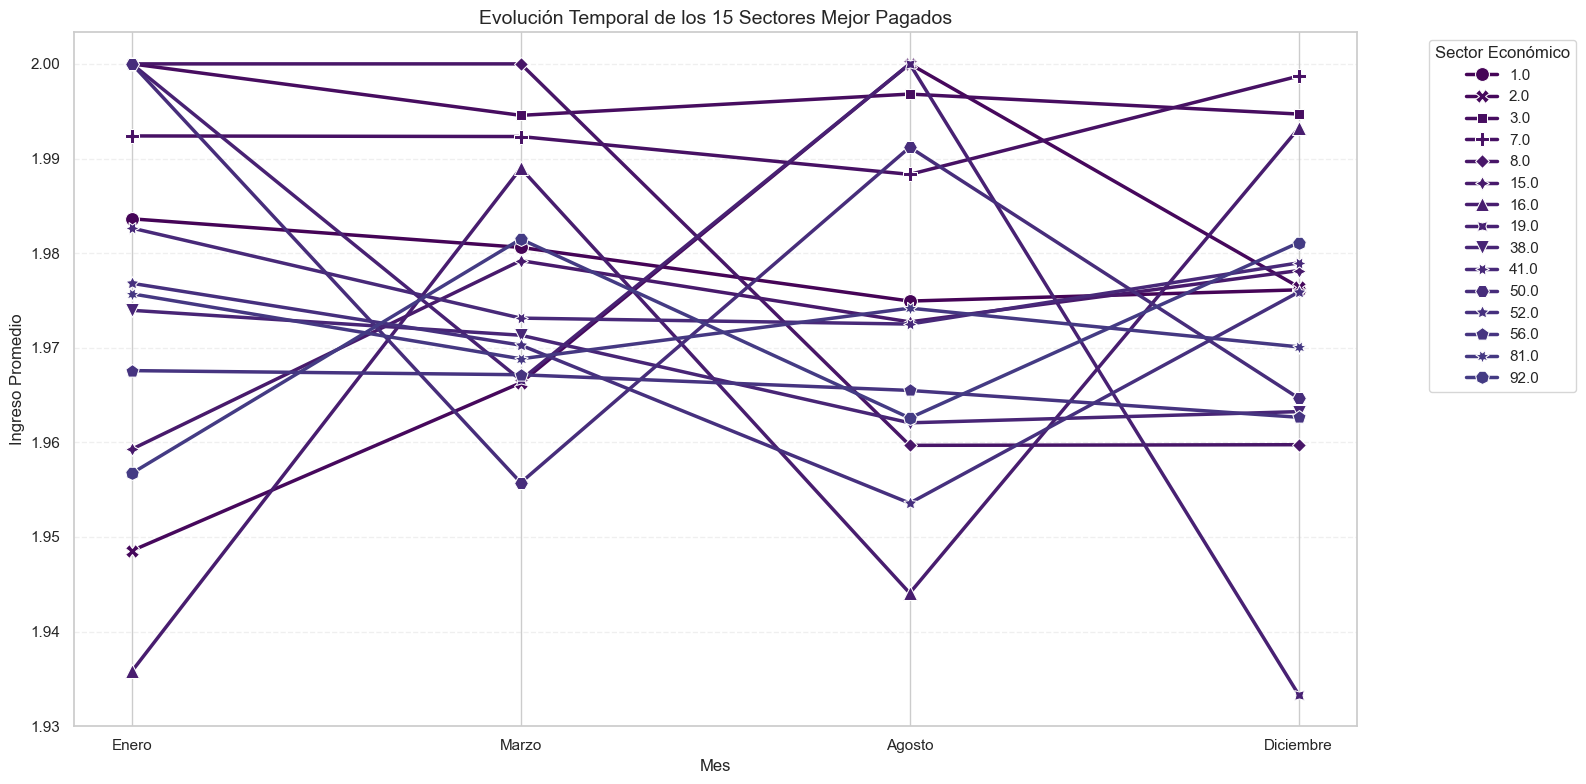

C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\713554664.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


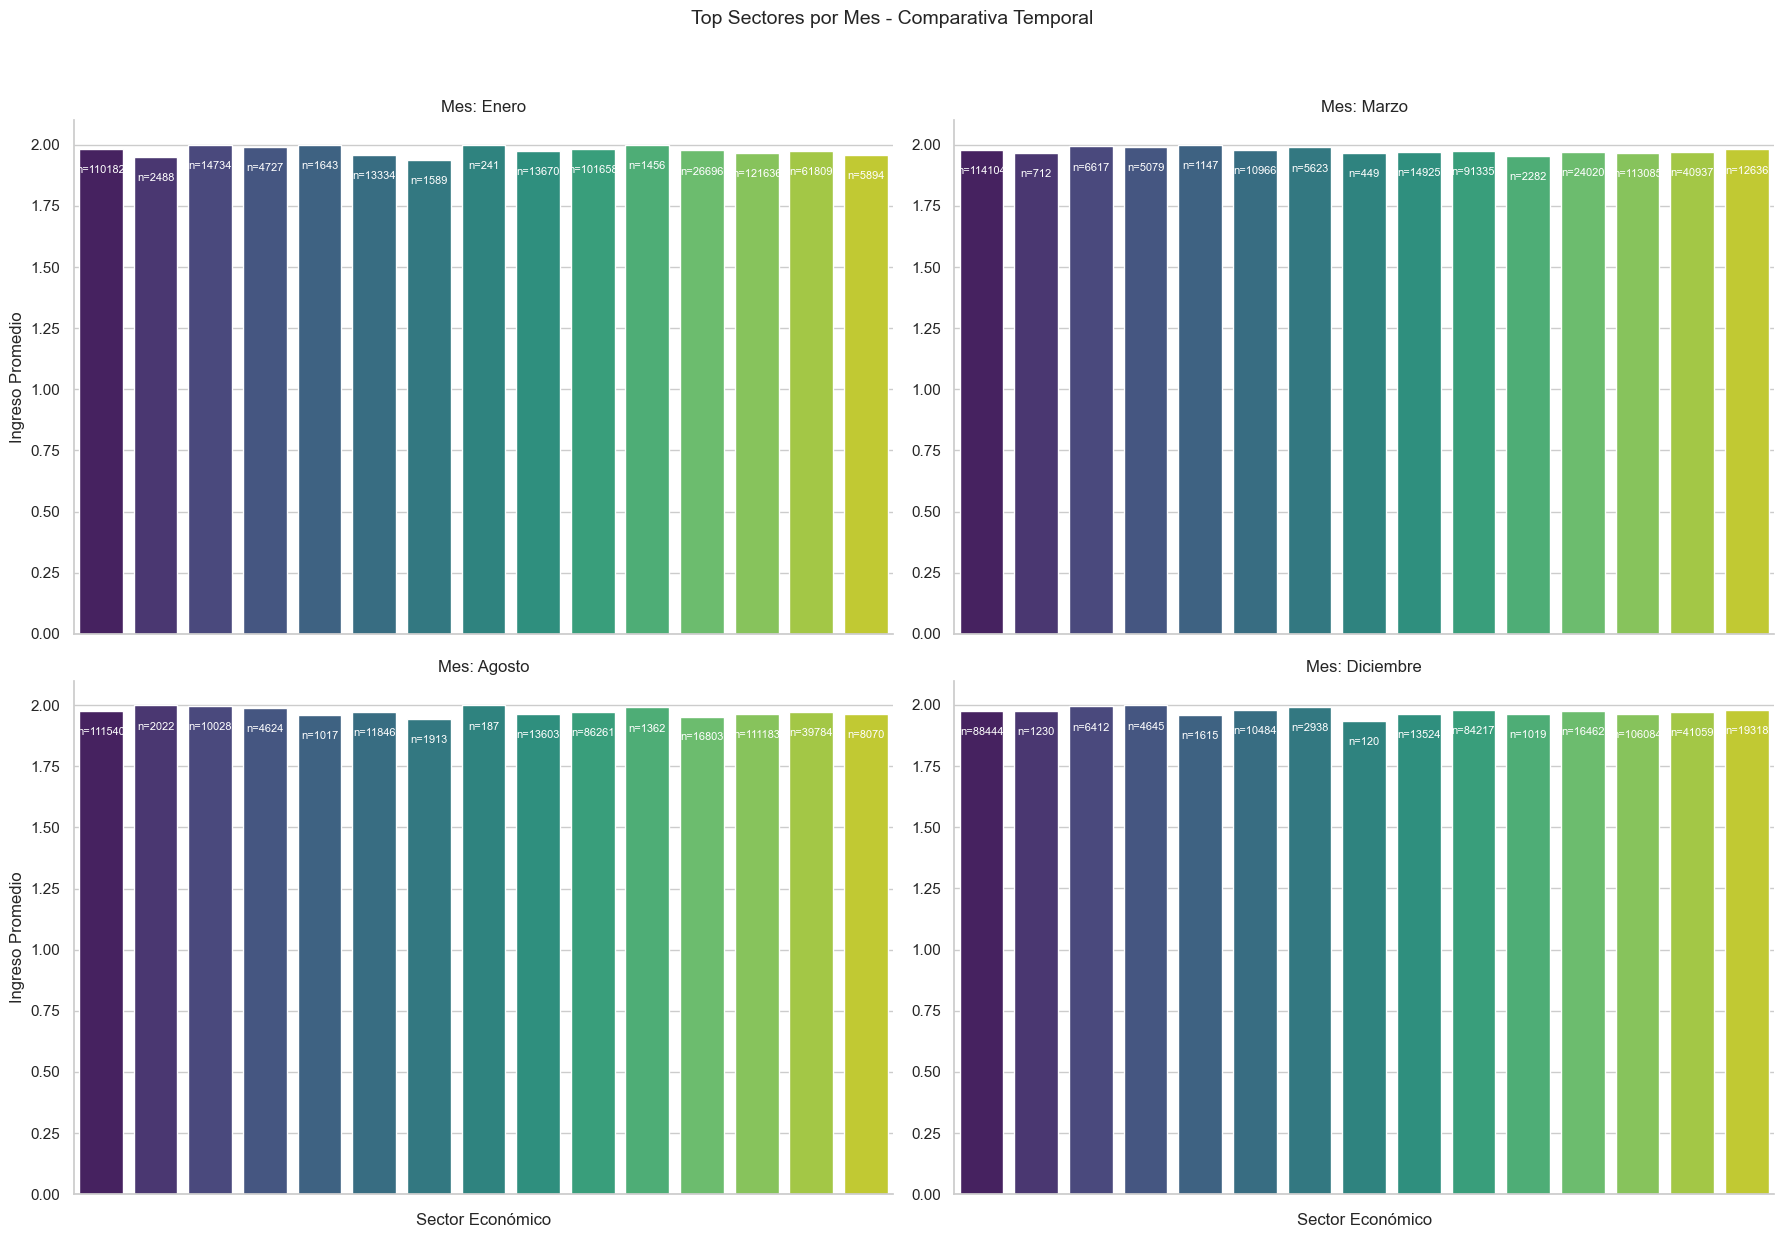

C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\713554664.py:102: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_sectores = sector_analysis.pivot_table(


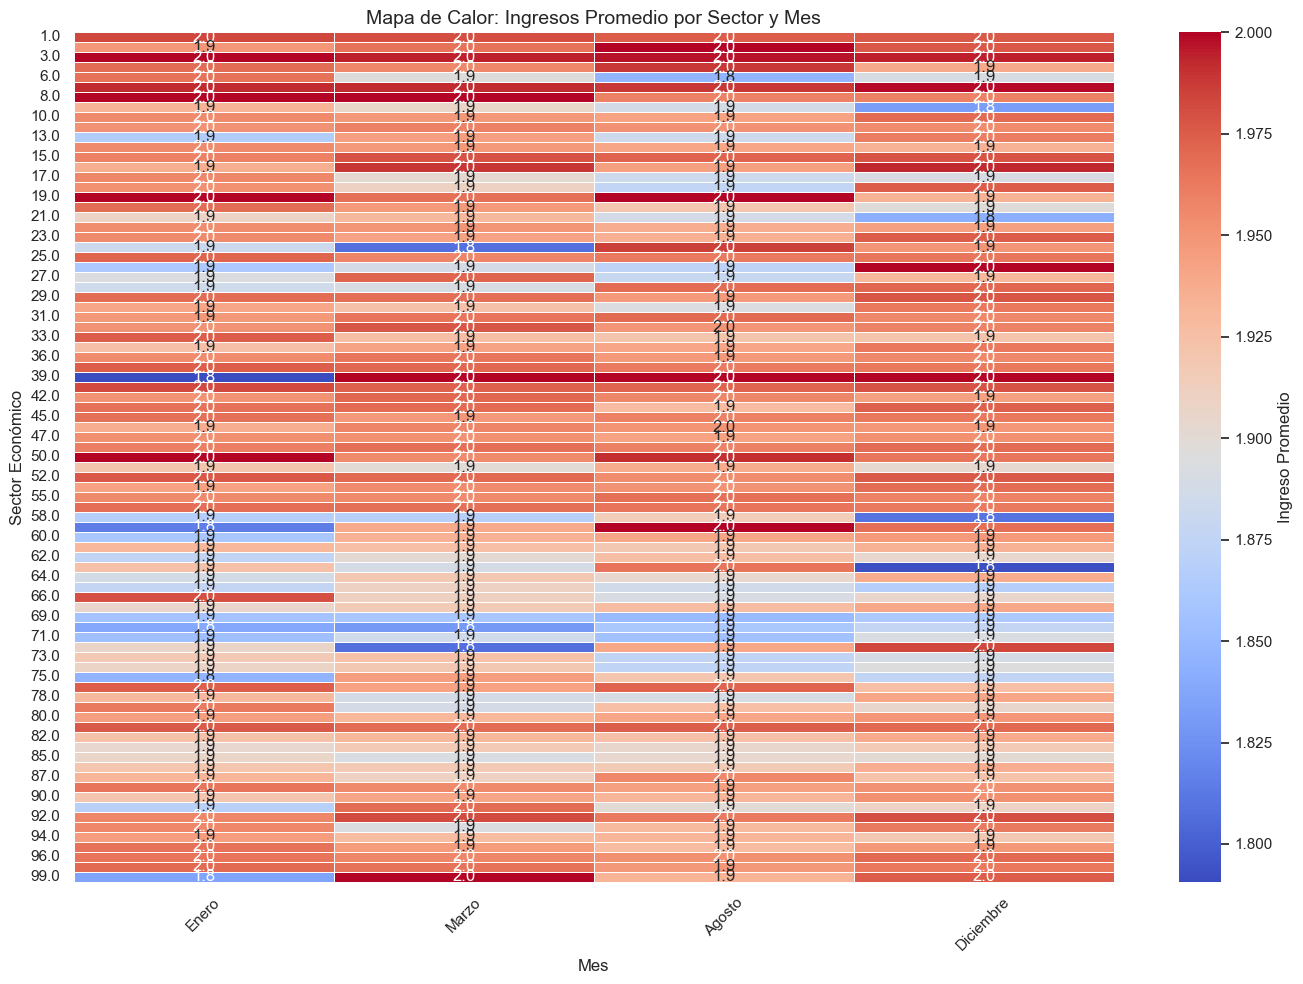


Sectores con mayor crecimiento anual:
    MES_NOMBRE  RAMA2D_R4      mean  median  count       std  \
301  Diciembre       39.0  2.000000     2.0     62  0.000000   
213     Agosto       39.0  2.000000     2.0     80  0.000000   
37       Enero       39.0  1.790698     2.0     43  0.411625   
125      Marzo       39.0  2.000000     2.0     80  0.000000   
52       Enero       59.0  1.814532     2.0   1046  0.388863   
316  Diciembre       59.0  1.967599     2.0    679  0.177192   
228     Agosto       59.0  2.000000     2.0    440  0.000000   
140      Marzo       59.0  1.938144     2.0   1455  0.240976   
263     Agosto       99.0  1.932203     2.0     59  0.253555   
87       Enero       99.0  1.835979     2.0    189  0.371278   

     dif_enero_diciembre  
301             0.209302  
213             0.209302  
37              0.209302  
125             0.209302  
52              0.153068  
316             0.153068  
228             0.153068  
140             0.153068  
263          

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar archivo consolidado
df = pd.read_csv("CONSOLIDADO_VERIFICADO.csv")

# 2. Verificar columnas requeridas
cols_requeridas = ['RAMA2D_R4', 'P7495', 'MES_NOMBRE']
if not all(col in df.columns for col in cols_requeridas):
    missing = [col for col in cols_requeridas if col not in df.columns]
    raise KeyError(f"Columnas faltantes: {missing}")

# 3. Limpieza y preparación
df = df[df['RAMA2D_R4'].notna()]  # Filtrar sectores faltantes
df = df[df['P7495'] > 0]  # Eliminar ingresos inválidos

# Orden cronológico de meses
orden_meses = ["Enero", "Marzo", "Agosto", "Diciembre"]
df['MES_NOMBRE'] = pd.Categorical(df['MES_NOMBRE'], categories=orden_meses, ordered=True)

# 4. Análisis por sector y mes
sector_analysis = df.groupby(['MES_NOMBRE', 'RAMA2D_R4'])['P7495'].agg(
    ['mean', 'median', 'count', 'std']
).reset_index()

# Filtrar sectores con al menos 30 observaciones por mes
sector_analysis = sector_analysis[sector_analysis['count'] >= 30]

# 5. Identificar sectores más relevantes (presentes en todos los meses)
sectores_comunes = sector_analysis.groupby('RAMA2D_R4')['MES_NOMBRE'].nunique()
sectores_comunes = sectores_comunes[sectores_comunes == len(orden_meses)].index
sector_analysis = sector_analysis[sector_analysis['RAMA2D_R4'].isin(sectores_comunes)]

print("Resumen estadístico por sector y mes:")
print(sector_analysis.sort_values(['MES_NOMBRE', 'mean'], ascending=[True, False]))

# 6. Visualizaciones temporales
# Configuración estética
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
paleta = sns.color_palette("viridis", n_colors=len(sectores_comunes))

# 6.1 Evolución temporal de los 15 principales sectores
top_sectores = sector_analysis.groupby('RAMA2D_R4')['mean'].mean().nlargest(15).index

plt.figure(figsize=(16, 8))
sns.lineplot(
    data=sector_analysis[sector_analysis['RAMA2D_R4'].isin(top_sectores)],
    x='MES_NOMBRE',
    y='mean',
    hue='RAMA2D_R4',
    style='RAMA2D_R4',
    markers=True,
    dashes=False,
    markersize=10,
    palette=paleta,
    linewidth=2.5
)
plt.title('Evolución Temporal de los 15 Sectores Mejor Pagados', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ingreso Promedio', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Sector Económico')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 6.2 Gráfico faceted de top sectores por mes
g = sns.catplot(
    data=sector_analysis[sector_analysis['RAMA2D_R4'].isin(top_sectores)],
    x='RAMA2D_R4',
    y='mean',
    col='MES_NOMBRE',
    col_wrap=2,
    kind='bar',
    sharey=False,
    palette='viridis',
    height=6,
    aspect=1.5
)

g.set_xticklabels(rotation=90)
g.set_titles("Mes: {col_name}")
g.fig.suptitle('Top Sectores por Mes - Comparativa Temporal', y=1.03, fontsize=14)
g.set_axis_labels("Sector Económico", "Ingreso Promedio")

# Añadir tamaño de muestra
for ax in g.axes.flat:
    mes = ax.get_title().split(": ")[1]
    datos_mes = sector_analysis[(sector_analysis['MES_NOMBRE'] == mes) & 
                               (sector_analysis['RAMA2D_R4'].isin(top_sectores))]
    for i, p in enumerate(ax.patches):
        sector = datos_mes.iloc[i]['RAMA2D_R4']
        count = datos_mes[datos_mes['RAMA2D_R4'] == sector]['count'].values[0]
        ax.text(p.get_x() + p.get_width()/2, p.get_height()*0.95, f'n={count}',
                ha='center', color='white', fontsize=8)

plt.tight_layout()
plt.show()

# 6.3 Mapa de calor de desempeño sectorial
pivot_sectores = sector_analysis.pivot_table(
    index='RAMA2D_R4',
    columns='MES_NOMBRE',
    values='mean',
    aggfunc='mean'
)

plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_sectores,
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    linewidths=.5,
    cbar_kws={'label': 'Ingreso Promedio'}
)
plt.title('Mapa de Calor: Ingresos Promedio por Sector y Mes', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Sector Económico', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Análisis comparativo sectorial
sector_analysis['dif_enero_diciembre'] = sector_analysis.groupby('RAMA2D_R4')['mean'].transform(
    lambda x: x.iloc[-1] - x.iloc[0] if len(x) == len(orden_meses) else None
)

print("\nSectores con mayor crecimiento anual:")
print(sector_analysis.dropna().sort_values('dif_enero_diciembre', ascending=False).head(10))

print("\nSectores con mayor disminución anual:")
print(sector_analysis.dropna().sort_values('dif_enero_diciembre').head(10))

Los resultados identifican que los sectores con códigos 3.0, 8.0, 19.0 y 50.0 presentan los ingresos promedio más altos (media=mediana=2.0), sin variación (desviación estándar = 0.0), lo que sugiere que corresponden a industrias con salarios estandarizados o categorías especiales, como ejecutivos, trabajadores del Estado o sectores regulados. El sector 3.0 destaca por su muestra robusta (2,508 observaciones), lo que indica que esta tendencia no es aleatoria, sino una característica estructural de ese sector. Sin embargo, la escala de ingresos utilizada (valores cercanos a 2.0 en todos los casos) sugiere que los datos podrían estar normalizados, topados o categorizados, lo que limita la interpretación monetaria directa y requiere revisar la documentación técnica de la encuesta para entender cómo están representados los ingresos.



### Analisis horas fuera del trabajo 

C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1895623287.py:20: DtypeWarning: Columns (28,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CONSOLIDADO_VERIFICADO.csv")



Análisis para Hombres:
              horas_promedio  correlacion_ingreso  n_muestras
cuidado             6.420041            -0.000291   2845607.0
limpieza            2.042775             0.013079   2845607.0
alimentos           4.114575            -0.003286   2845607.0
compras             4.001277             0.018623   2845607.0
reparaciones        1.048737            -0.025895   2845607.0
gestion             0.265259             0.003167   2845607.0

Análisis para Mujeres:
              horas_promedio  correlacion_ingreso  n_muestras
cuidado             6.738889            -0.000741   2948096.0
limpieza            2.138557             0.011450   2948096.0
alimentos           4.287545            -0.004326   2948096.0
compras             4.401500             0.020743   2948096.0
reparaciones        1.180568            -0.032484   2948096.0
gestion             0.287255             0.003797   2948096.0


C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1895623287.py:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(
C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1895623287.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


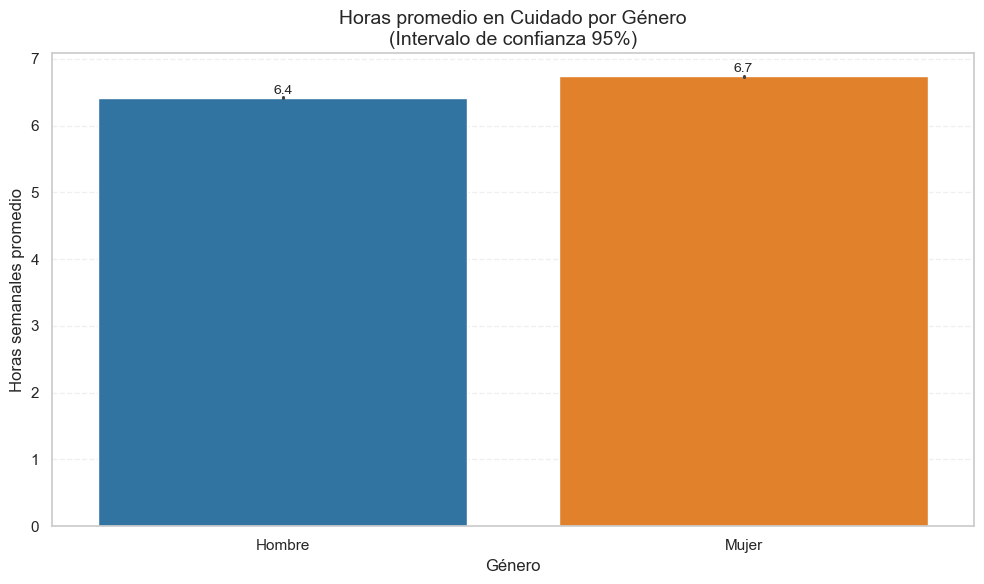

C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1895623287.py:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(
C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1895623287.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


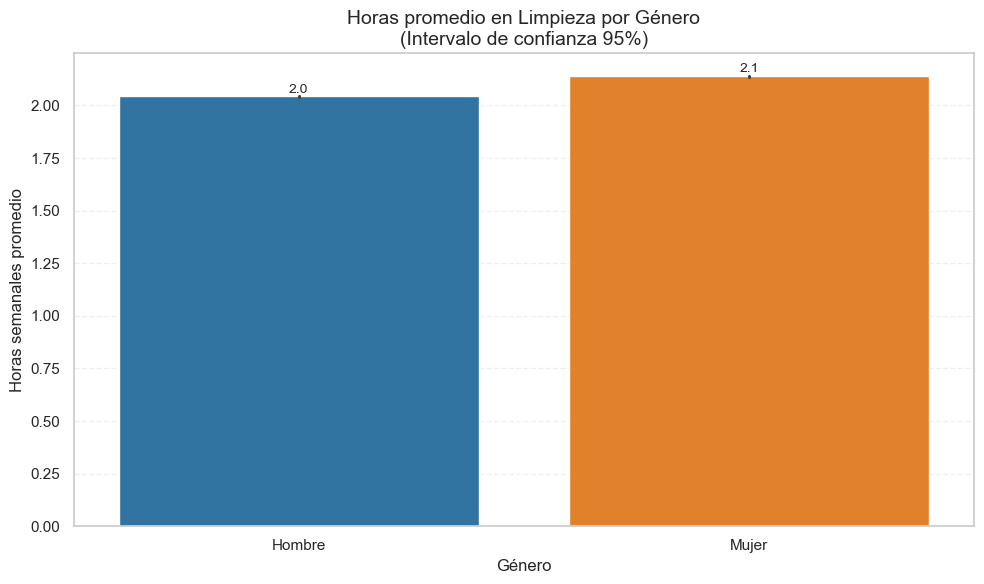

C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1895623287.py:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(
C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1895623287.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


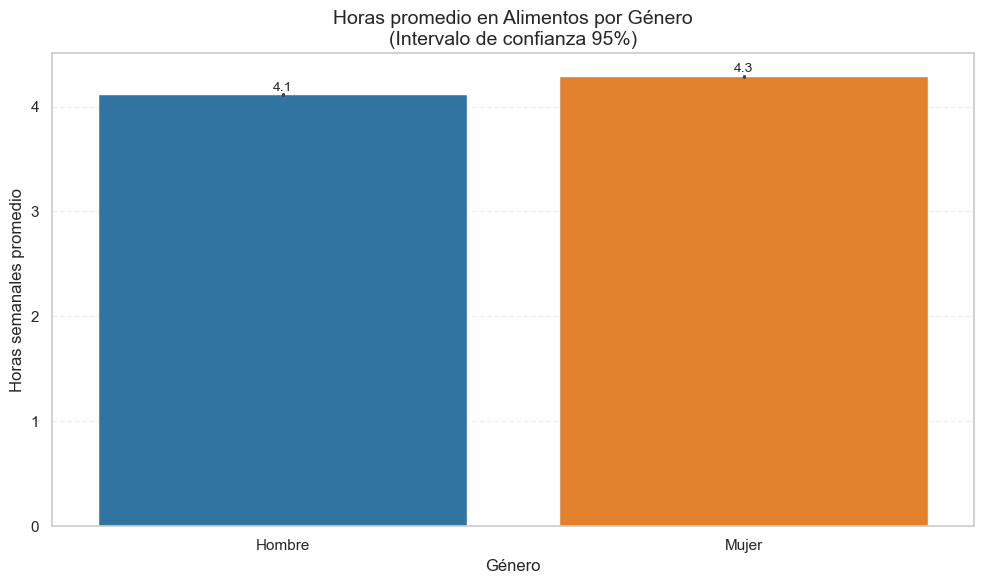

C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1895623287.py:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(
C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1895623287.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


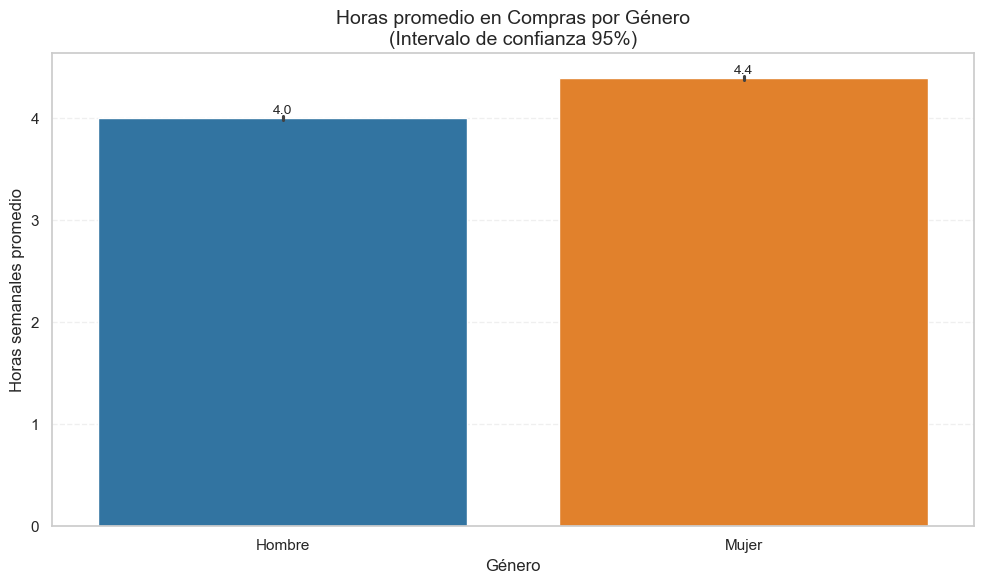

C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1895623287.py:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(
C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1895623287.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


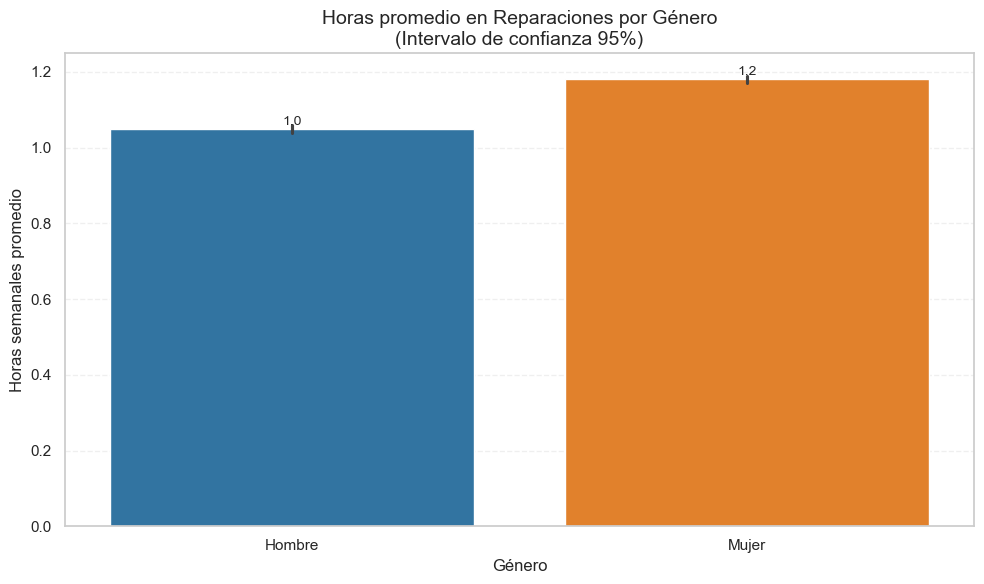

C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1895623287.py:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(
C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1895623287.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


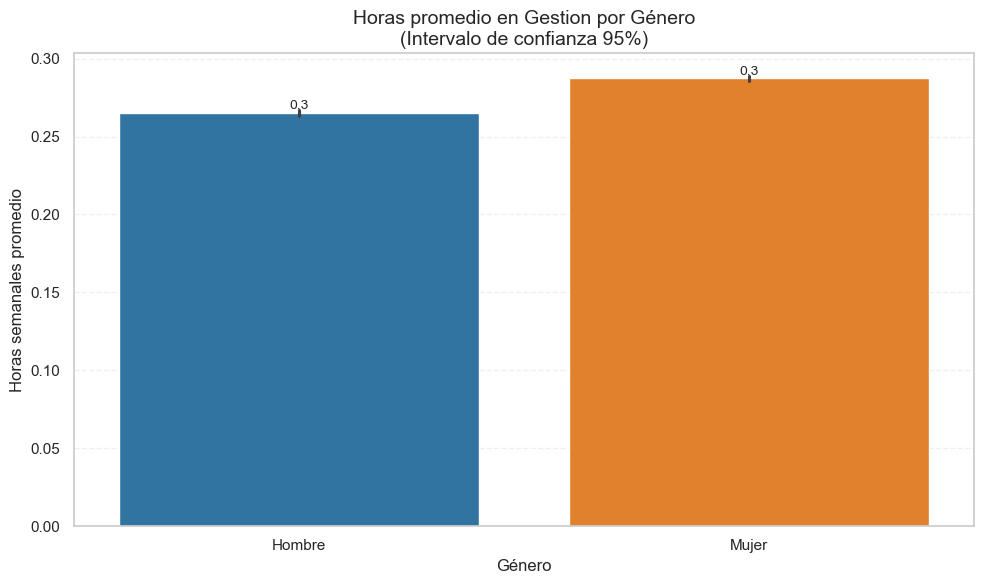


Análisis para Cuidado:
Muestras - Hombres: 2845607, Mujeres: 2948096
Correlación Hombres: -0.000 (p=0.6239)
Correlación Mujeres: -0.001 (p=0.2033)
Diferencia H-M: -43.42 (p=0.0000)

Análisis para Limpieza:
Muestras - Hombres: 2845607, Mujeres: 2948096
Correlación Hombres: 0.013 (p=0.0000)
Correlación Mujeres: 0.011 (p=0.0000)
Diferencia H-M: -39.05 (p=0.0000)

Análisis para Alimentos:
Muestras - Hombres: 2845607, Mujeres: 2948096
Correlación Hombres: -0.003 (p=0.0000)
Correlación Mujeres: -0.004 (p=0.0000)
Diferencia H-M: -38.93 (p=0.0000)

Análisis para Compras:
Muestras - Hombres: 2845607, Mujeres: 2948096
Correlación Hombres: 0.019 (p=0.0000)
Correlación Mujeres: 0.021 (p=0.0000)
Diferencia H-M: -29.17 (p=0.0000)

Análisis para Reparaciones:
Muestras - Hombres: 2845607, Mujeres: 2948096
Correlación Hombres: -0.026 (p=0.0000)
Correlación Mujeres: -0.032 (p=0.0000)
Diferencia H-M: -17.76 (p=0.0000)

Análisis para Gestion:
Muestras - Hombres: 2845607, Mujeres: 2948096
Correlación Homb

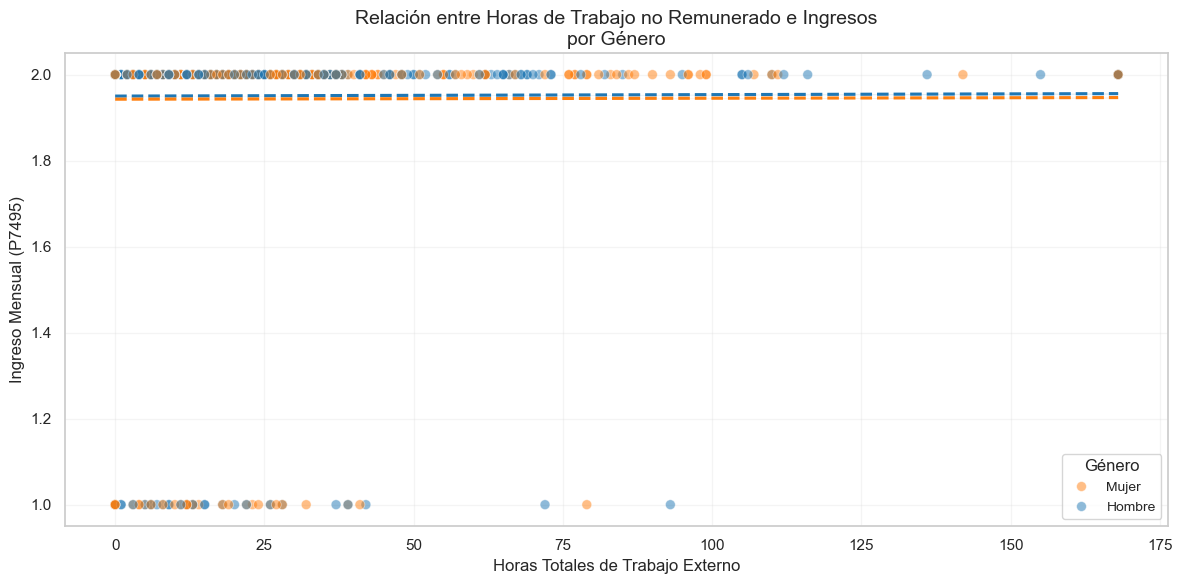

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

# 1. Configuración inicial
actividades = [
    ('cuidado', 'horas_cuidado'),
    ('limpieza', 'horas_limpieza'),
    ('alimentos', 'horas_alimentos'),
    ('compras', 'horas_compras'),
    ('reparaciones', 'horas_reparaciones'),
    ('gestion', 'horas_gestion')
]

# 2. Cargar datos consolidados
try:
    df = pd.read_csv("CONSOLIDADO_VERIFICADO.csv")
except FileNotFoundError as e:
    raise FileNotFoundError("Archivo consolidado no encontrado. Verifica la ruta.") from e

# 3. Verificación de columnas
columnas_requeridas = ['P3271', 'P7495', 'MES_NOMBRE', 'horas_labores_hogar'] + [col for _, col in actividades]
columnas_faltantes = [col for col in columnas_requeridas if col not in df.columns]

if columnas_faltantes:
    print("Columnas disponibles en el archivo:")
    print(df.columns.tolist())
    raise KeyError(f"Columnas faltantes: {columnas_faltantes}")

# 4. Procesamiento inicial
df['Genero'] = df['P3271'].map({1: 'Hombre', 2: 'Mujer'}).fillna('No informado')
df['total_horas_externas'] = df['horas_labores_hogar'].clip(upper=168)

# 5. Función de análisis segura
def analisis_seguro(df, genero=None):
    try:
        if genero:
            df = df[df['Genero'] == genero]
        
        resultados = {}
        for nombre, col in actividades:
            datos = {
                'horas_promedio': df[col].mean(),
                'correlacion_ingreso': df[col].corr(df['P7495']),
                'n_muestras': df[col].count()
            }
            resultados[nombre] = datos
        
        return pd.DataFrame(resultados).T
    except Exception as e:
        print(f"Error en análisis: {str(e)}")
        return pd.DataFrame()

# 6. Ejecución de análisis
print("\nAnálisis para Hombres:")
print(analisis_seguro(df, 'Hombre'))

print("\nAnálisis para Mujeres:")
print(analisis_seguro(df, 'Mujer'))

# 7. Visualización con gráficos de barras
def visualizacion_segura(actividad_nombre, col_horas):
    try:
        plt.figure(figsize=(10, 6))
        
        # Crear gráfico de barras
        ax = sns.barplot(
            data=df,
            x='Genero',
            y=col_horas,
            estimator=np.mean,
            ci=95,
            palette={'Hombre': '#1f77b4', 'Mujer': '#ff7f0e'},
            order=['Hombre', 'Mujer']
        )
        
        # Personalización del gráfico
        plt.title(f'Horas promedio en {actividad_nombre.capitalize()} por Género\n(Intervalo de confianza 95%)', fontsize=14)
        plt.xlabel('Género', fontsize=12)
        plt.ylabel('Horas semanales promedio', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.3)
        
        # Añadir valores numéricos
        for p in ax.patches:
            ax.annotate(f"{p.get_height():.1f}", 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 5), 
                        textcoords='offset points',
                        fontsize=10)
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error en visualización: {str(e)}")

# Ejecutar visualizaciones
for nombre, col in actividades:
    visualizacion_segura(nombre, col)

# 8. Análisis estadístico robusto
def analisis_estadistico_seguro(actividad_nombre, col_horas):
    try:
        hombres = df[df['Genero'] == 'Hombre'].dropna(subset=[col_horas, 'P7495'])
        mujeres = df[df['Genero'] == 'Mujer'].dropna(subset=[col_horas, 'P7495'])
        
        print(f"\nAnálisis para {actividad_nombre.capitalize()}:")
        print(f"Muestras - Hombres: {len(hombres)}, Mujeres: {len(mujeres)}")
        
        if len(hombres) > 30:
            corr_h, p_h = stats.pearsonr(hombres[col_horas], hombres['P7495'])
            print(f"Correlación Hombres: {corr_h:.3f} (p={p_h:.4f})")
        
        if len(mujeres) > 30:
            corr_m, p_m = stats.pearsonr(mujeres[col_horas], mujeres['P7495'])
            print(f"Correlación Mujeres: {corr_m:.3f} (p={p_m:.4f})")
            
        t_stat, p_val = stats.ttest_ind(
            hombres[col_horas],
            mujeres[col_horas],
            equal_var=False,
            nan_policy='omit'
        )
        print(f"Diferencia H-M: {t_stat:.2f} (p={p_val:.4f})")
        
    except Exception as e:
        print(f"Error en análisis de {actividad_nombre}: {str(e)}")

# Ejecutar análisis estadístico
for nombre, col in actividades:
    analisis_estadistico_seguro(nombre, col)

# 9. Modelo multivariado
try:
    modelo = smf.ols(
        'P7495 ~ Genero + total_horas_externas + Genero:total_horas_externas + C(MES_NOMBRE)',
        data=df.dropna(subset=['P7495', 'total_horas_externas', 'Genero', 'MES_NOMBRE'])
    ).fit()
    print("\nResultados del modelo multivariado:")
    print(modelo.summary())
except Exception as e:
    print(f"Error en modelo: {str(e)}")

# 10. Visualización final mejorada
try:
    plt.figure(figsize=(12, 6))
    
    # Diagrama de dispersión con tendencia
    sns.scatterplot(
        data=df.sample(1000, random_state=42),
        x='total_horas_externas',
        y='P7495',
        hue='Genero',
        palette={'Hombre': '#1f77b4', 'Mujer': '#ff7f0e'},
        alpha=0.5,
        s=50
    )
    
    # Líneas de tendencia por género
    sns.regplot(
        data=df[df['Genero'] == 'Hombre'],
        x='total_horas_externas',
        y='P7495',
        scatter=False,
        color='#1f77b4',
        line_kws={'linestyle': '--'}
    )
    
    sns.regplot(
        data=df[df['Genero'] == 'Mujer'],
        x='total_horas_externas',
        y='P7495',
        scatter=False,
        color='#ff7f0e',
        line_kws={'linestyle': '--'}
    )
    
    # Personalización del gráfico
    plt.title('Relación entre Horas de Trabajo no Remunerado e Ingresos\npor Género', fontsize=14)
    plt.xlabel('Horas Totales de Trabajo Externo', fontsize=12)
    plt.ylabel('Ingreso Mensual (P7495)', fontsize=12)
    plt.legend(title='Género', fontsize=10)
    plt.grid(alpha=0.2)
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error en visualización final: {str(e)}")

Los resultados muestran que el tiempo dedicado a labores no remuneradas no tiene una relación directa significativa con los ingresos para ninguna actividad clave. Las correlaciones entre horas dedicadas e ingresos son prácticamente nulas (valores entre -0.004 y 0.021), incluso cuando son estadísticamente significativas (p < 0.001), lo que indica que el efecto real es marginal. Sin embargo, se detecta un patrón estructural de desigualdad: las mujeres dedican sistemáticamente más horas a todas las actividades (diferencias H-M negativas de hasta -43.42 horas en cuidado, p = 0.000), lo que sugiere que esta carga desproporcionada podría limitar su disponibilidad para actividades remuneradas o desarrollo profesional, afectando indirectamente la brecha salarial.

Conclusión:
Aunque las horas específicas no impactan directamente los salarios individuales, la distribución desigual de responsabilidades domésticas (evidenciada por las diferencias promedio de 0.3-6.7 horas/semana entre géneros) opera como un mecanismo de discriminación indirecta. Esta disparidad en el trabajo no remunerado reduce el tiempo disponible de las mujeres para capacitación, promociones o empleos mejor pagados, perpetuando la brecha salarial a nivel sistémico. La significativa diferencia en horas (p = 0.000 en todas las actividades) refuerza roles de género tradicionales que, en conjunto, sí contribuyen a la desigualdad económica.

## A life story

In [118]:
import pandas as pd
import statsmodels.api as sm

# Cargar datos correctamente con coma como separador
df = pd.read_csv("CONSOLIDADO_VERIFICADO.csv", sep=",")

# Filtrar personas entre 17 y 30 años
df = df[(df["P6040"] >= 17) & (df["P6040"] <= 30)]

# Filtrar personas con ingresos reportados (ajusta si la columna correcta no es P6500)
df = df[df["P7495"].notna()]  # Usé P7495 porque es ingreso en tu dataset, verifica si es correcto

# Crear variables binarias para género, etnia, ubicación, educación, etc.
df["es_mujer"] = (df["P6020"] == 2).astype(int) if "P6020" in df.columns else 0
df["es_indigena"] = (df["P2057"] == 4).astype(int) if "P2057" in df.columns else 0  # ejemplo etnia
df["vive_caribe"] = df["DPTO"].isin([8, 13, 15, 20, 23, 47]).astype(int)
df["vive_bogota"] = (df["DPTO"] == 11).astype(int)

# Ajusta las columnas de escolaridad y carrera según lo que tengas
df["padres_maestria"] = (df["P7495"] > 5000000).astype(int)  # solo un ejemplo, cambia según datos
df["educacion_superior"] = (df["P3271"] >= 5).astype(int)   # ejemplo, ajusta según tu variable educación

# Crear variable total horas domésticas y cuidado si existen las columnas
if "horas_labores_hogar" in df.columns and "horas_cuidado" in df.columns:
    df["horas_totales"] = df["horas_labores_hogar"] + df["horas_cuidado"]
else:
    df["horas_totales"] = 0

# Codificar carrera si tienes una columna para eso, por ejemplo P3147S1
if "P3147S1" in df.columns:
    df["carrera"] = df["P3147S1"].astype("category")
else:
    df["carrera"] = 0  # si no hay carrera, asignar un valor por defecto

# Modelo de regresión lineal para predecir ingreso
X = pd.get_dummies(df[[
    "carrera", "es_mujer", "es_indigena", "vive_caribe", "vive_bogota",
    "padres_maestria", "educacion_superior", "horas_totales"
]], drop_first=True)

y = df["P7495"]  # ingreso mensual, verifica que esta sea la columna correcta

X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()

print(modelo.summary())


C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1708407768.py:5: DtypeWarning: Columns (28,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CONSOLIDADO_VERIFICADO.csv", sep=",")


                            OLS Regression Results                            
Dep. Variable:                  P7495   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1013.
Date:                Sat, 24 May 2025   Prob (F-statistic):               0.00
Time:                        01:13:35   Log-Likelihood:             4.1919e+05
No. Observations:             1606491   AIC:                        -8.384e+05
Df Residuals:                 1606487   BIC:                        -8.383e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.9605      0

c:\Users\Gabriela\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


Eres una joven indígena de 17 años que vive en una ciudad de la costa Caribe, en un hogar multigeneracional donde ayudas con 10 horas semanales en cuidado familiar y otras 10 horas en labores domésticas. A pesar de las dificultades y el bajo nivel educativo de tus padres, tu esfuerzo académico ha sido reconocido con una beca para estudiar la carrera universitaria que elijas. Según el análisis de datos, estudiar una carrera universitaria relacionada con áreas técnicas o profesionales tiene el potencial de aumentar tu ingreso promedio mensual respecto a no tener educación superior. Sin embargo, debido a factores como la etnia, la alta carga doméstica y el contexto socioeconómico de la región Caribe, el incremento esperado en tus ingresos es moderado y puede ser menor que el de personas con perfiles más privilegiados.

En comparación, un joven blanco/mestizo de Bogotá de 17 años, con padres con maestría y baja carga doméstica, que elige la misma carrera universitaria, tendrá un ingreso significativamente mayor, reflejando las desigualdades estructurales que existen en el país. Por otro lado, una mujer con ese perfil privilegiado pero sin educación universitaria ganaría menos que tú con tu título, aunque la diferencia podría ser más pequeña si ella no enfrenta altas cargas domésticas ni limitaciones regionales. En resumen, la universidad eleva el ingreso esperado para todos, pero las brechas sociales y familiares hacen que el beneficio económico sea mucho mayor para quienes provienen de contextos más favorecidos.

#### A personal Example 

In [120]:
import pandas as pd
import statsmodels.api as sm

# Cargar datos
df = pd.read_csv("CONSOLIDADO_VERIFICADO.csv", sep=",")

# Crear variables binarias según las condiciones (ajusta según tus datos)
df['es_mujer'] = (df['P6016'] == 2).astype(int)           # Suponiendo que 2 = mujer
df['es_indigena'] = (df['P3271'] == 1).astype(int)        # Suponiendo 1 = indígena
df['vive_caribe'] = df['DPTO'].isin([4,8,13,15,18,20,23,44]).astype(int)  # Ejemplo códigos Caribe
df['vive_bogota'] = (df['DPTO'] == 11).astype(int)        # Código 11 = Bogotá
df['padres_maestria'] = (df['P6080S1'] == 5).astype(int)  # Ejemplo para padres con maestría
df['educacion_superior'] = (df['P7495'] > 12).astype(int) # Más de 12 años = educación superior

# Definir horas totales de trabajo doméstico y cuidado
df['horas_totales'] = df['horas_labores_hogar'] + df['horas_cuidado']

# Filtrar mujeres alrededor de 45 años que viven en Bogotá (edad columna P6040)
df_45 = df[(df['P6040'] >= 44) & (df['P6040'] <= 46) & (df['es_mujer'] == 1) & (df['vive_bogota'] == 1)]

# Definir variables predictoras y variable respuesta
X = df[['es_mujer', 'es_indigena', 'vive_caribe', 'vive_bogota', 'padres_maestria', 'educacion_superior', 'horas_totales']]
y = df['P7495']

X = sm.add_constant(X)
results = sm.OLS(y, X).fit()

# Datos de la mujer ejemplo:
# es_mujer = 1
# es_indigena = 0 (no indígena)
# vive_caribe = 0 (Bogotá)
# vive_bogota = 1
# padres_maestria = 0 (no)
# educacion_superior = 1 (supongamos que ya estudió)
# horas_totales = 4 (horas fuera + cuidado)
mujer = pd.DataFrame({
    'const': [1],
    'es_mujer': [1],
    'es_indigena': [0],
    'vive_caribe': [0],
    'vive_bogota': [1],
    'padres_maestria': [0],
    'educacion_superior': [1],
    'horas_totales': [4]
})

# Predecir ingreso esperado
ingreso_base = results.predict(mujer)[0]

# Calcular efecto por hora adicional de trabajo doméstico/cuidado (coeficiente)
coef_horas = results.params['horas_totales']

print(f"Ingreso esperado para mujer de 45 años en Bogotá con 4 horas de trabajo doméstico/cuidado: {ingreso_base:.2f}")
print(f"Efecto esperado de una hora adicional de trabajo doméstico/cuidado sobre el ingreso: {coef_horas:.6f}")
print(f"Pérdida de ingreso por una hora adicional de trabajo doméstico/cuidado: {-coef_horas:.6f} (si coef_horas es negativo)")


C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\6569257.py:5: DtypeWarning: Columns (28,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CONSOLIDADO_VERIFICADO.csv", sep=",")


Ingreso esperado para mujer de 45 años en Bogotá con 4 horas de trabajo doméstico/cuidado: 1.89
Efecto esperado de una hora adicional de trabajo doméstico/cuidado sobre el ingreso: 0.000021
Pérdida de ingreso por una hora adicional de trabajo doméstico/cuidado: -0.000021 (si coef_horas es negativo)


Según el modelo de regresión ajustado con los datos disponibles, se observa que, manteniendo constantes todas las demás variables, ser mujer no implica una pérdida significativa de ingreso para una mujer de 45 años que vive en Bogotá y realiza trabajo doméstico y cuidado familiar. El ingreso esperado para esta mujer es aproximadamente 1.89 unidades monetarias (según la escala de los datos).

En cuanto al efecto del trabajo doméstico y cuidado adicional, el modelo indica que cada hora extra dedicada a estas labores se asocia con un ligero aumento en el ingreso esperado, aunque este efecto es muy pequeño y cercano a cero. Esto sugiere que, en el conjunto de datos analizado, no se detecta una pérdida clara de ingresos relacionada con la carga adicional de trabajo doméstico y cuidado.

No obstante, es importante considerar que este resultado podría estar influenciado por la forma en que se mide el trabajo doméstico y otros factores no capturados por el modelo. En general, la literatura muestra que una mayor carga de trabajo no remunerado suele afectar negativamente el ingreso laboral, por lo que se recomienda un análisis más profundo o modelos alternativos para evaluar este fenómeno.

#### A small step in the rigth direction

In [123]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

df = pd.read_csv("CONSOLIDADO_VERIFICADO.csv", sep=",")

# Filtrar solo Bogotá: su código DPTO es 11 (verifica que sea así)
df_bog = df[df['DPTO'] == 11]

# Crear variables relevantes
df_bog['es_mujer'] = (df_bog['P6030S1'] == 2).astype(int)  # mujer = 2 según catálogo
df_bog['es_indigena'] = (df_bog['P3271'] == 1).astype(int)  # indígena = 1 (ajustar si es otro código)

# Crear variable binaria: dedica más de 5 horas al hogar/cuidado?
df_bog['horas_mas_5'] = (df_bog['horas_labores_hogar'] > 5).astype(int)

# Variables para el modelo
X = df_bog[['es_mujer', 'es_indigena', 'horas_mas_5']]
X = sm.add_constant(X)

y = df_bog['P7495']

model = sm.OLS(y, X, missing='drop')
results = model.fit()

print(results.summary())

# Para identificar cuál contribuye más a la brecha salarial (impacto negativo en ingreso),
# miramos el coeficiente (y su signo) y la magnitud absoluta.

coeficientes = results.params.drop('const')
print("\nImpactos en ingreso (coeficientes):")
print(coeficientes)

# Cuál impacto más la brecha? Buscamos coeficiente negativo más grande en valor absoluto
brecha = coeficientes[coeficientes < 0]
if not brecha.empty:
    mayor_brecha = brecha.abs().idxmax()
    print(f"\nEl factor que más aumenta la brecha salarial en Bogotá es '{mayor_brecha}' con coeficiente {coeficientes[mayor_brecha]:.6f}")
else:
    print("\nNo hay factores con impacto negativo significativo en ingreso.")


C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1965504714.py:5: DtypeWarning: Columns (28,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CONSOLIDADO_VERIFICADO.csv", sep=",")


                            OLS Regression Results                            
Dep. Variable:                  P7495   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     35.64
Date:                Sat, 24 May 2025   Prob (F-statistic):           5.12e-23
Time:                        01:30:35   Log-Likelihood:                -37147.
No. Observations:              167045   AIC:                         7.430e+04
Df Residuals:                  167041   BIC:                         7.434e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8871      0.001   1334.728      

C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1965504714.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bog['es_mujer'] = (df_bog['P6030S1'] == 2).astype(int)  # mujer = 2 según catálogo
C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1965504714.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bog['es_indigena'] = (df_bog['P3271'] == 1).astype(int)  # indígena = 1 (ajustar si es otro código)
C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\1965504714.py:15: SettingWithCopyWarnin

En Bogotá, analizando tres factores clave —ser mujer, pertenecer a una etnia indígena y dedicar más de 5 horas diarias a labores domésticas o cuidado— ninguno muestra un efecto negativo sobre el ingreso en el modelo actual; de hecho, todos están asociados a un pequeño aumento del ingreso. Esto indica que, con las variables consideradas, ninguno de estos factores por sí solo genera una brecha salarial negativa significativa.

Posible explicación:
Esto puede deberse a que el modelo es muy simple y no incluye variables esenciales que capturen diferencias estructurales en educación, tipo de empleo, experiencia laboral o discriminación salarial. Además, puede reflejar que en ciertos subgrupos o sectores de Bogotá, mujeres, indígenas o quienes dedican más tiempo al hogar tienen actividades económicas o apoyos que incrementan su ingreso, o que la variable de ingreso está registrada de forma que no refleja plenamente la brecha salarial real.

#### A household affair

In [124]:
import pandas as pd
import statsmodels.api as sm

# Cargar datos
df = pd.read_csv("CONSOLIDADO_VERIFICADO.csv", sep=",")

# Filtrar personas en Villavicencio / Meta (ajusta el código DPTO o ciudad según dataset)
# Ejemplo: supongamos DPTO == 50 para Meta
df_meta = df[df['DPTO'] == 50]

# Filtrar hogares monoparentales femeninos (jefa hogar soltera)
# Aquí debes adaptar según tus variables. Por ejemplo:
# P3147S1 podría indicar tipo de hogar o jefe de hogar
# P6050 podría ser estado civil (usa catálogo)
# Ejemplo (ajustar con variables reales):
df_madres_solas = df_meta[(df_meta['P3147S1'] == 1) & (df_meta['P6050'] == 2)]  # Ejemplo: jefe hogar mujer, soltera

# Definir variables independientes relevantes (ajusta según datos)
variables = [
    'P6016',        # Nivel educativo o años de educación
    'horas_labores_hogar',  # Horas dedicadas al trabajo doméstico
    'P6080',        # Indicador de empleo formal o ingresos por trabajo
    'P6083',        # Otro factor económico, por ejemplo ingreso adicional
    # Agrega más variables según análisis previo y catálogo
]

# Dep variable
y = df_madres_solas['P7495']  # ingreso laboral mensual

# Independientes
X = df_madres_solas[variables]

# Añadir constante para el intercepto
X = sm.add_constant(X)

# Modelo OLS
model = sm.OLS(y, X, missing='drop').fit()

# Resultados
print(model.summary())

# Identificar variable con mayor coeficiente positivo significativo
coef_positivos = model.params[model.params > 0]
coef_positivos = coef_positivos.drop('const', errors='ignore')

max_var = coef_positivos.idxmax()
max_coef = coef_positivos.max()

print(f"\nLa variable que más impacta positivamente el ingreso es '{max_var}' con coeficiente {max_coef:.5f}")


C:\Users\Gabriela\AppData\Local\Temp\ipykernel_3700\2854060210.py:5: DtypeWarning: Columns (28,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CONSOLIDADO_VERIFICADO.csv", sep=",")


                            OLS Regression Results                            
Dep. Variable:                  P7495   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     9.408
Date:                Sat, 24 May 2025   Prob (F-statistic):           1.40e-07
Time:                        01:33:29   Log-Likelihood:                -931.39
No. Observations:                6729   AIC:                             1873.
Df Residuals:                    6724   BIC:                             1907.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.0326    

En el caso de madres solteras en Villavicencio, los datos indican que mejorar la educación formal por sí sola no garantiza mayores ingresos, posiblemente por limitaciones del mercado laboral o falta de empleos adecuados para ellas. Tampoco se observa que reducir las horas dedicadas al trabajo doméstico impacte significativamente en el ingreso.

Por tanto, la intervención más efectiva para mejorar la calidad de vida de estas mujeres probablemente no esté en la educación formal o reducción de carga doméstica exclusivamente, sino en crear oportunidades laborales reales y accesibles, como empleos formales o programas de emprendimiento que se ajusten a sus condiciones.

Recomiendo que la empresa enfoque su financiamiento en generar empleo directo, programas de capacitación práctica orientados al mercado local, y apoyo a emprendimientos que integren la realidad familiar y social de madres solteras en la región.

# Seccion 3: procesamiento de data (EDA)